In [1]:
## Important Options:
run_epochs = 300
run_model_type = "VAE"

run_save_folder = "../../outputs/experiments_test/fashion_mnist/vae_l2/" 
run_read_data_folder = "../../data/examples_fashion_mnist/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "50_samples_per_class" # 5; 10; 25, 50;


In [2]:
ls ../../outputs

experiments_test/


In [3]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --kl-anneal \
    --kl-anneal-start 0.0 \
    --kl-anneal-stop 1.0 \
    --kl-anneal-ratio 0.5 \
    --kl-anneal-delay-epochs 20 \
    --l2-reg 100.0 \
    --trust-set-name {trust_set_name}


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_frey_faces/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=1.0, kl_anneal=True, kl_anneal_cycles=1, kl_anneal_delay_epochs=20, kl_anneal_ratio=0.5, kl_anneal_start=0.0, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=100.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='VAE', number_epochs=300, output_folder='../../outputs/experiments_test/freyfaces/vae_l2/', q_y_x_coeff=1.0, qy_sup_weights=None, reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=False, sigma_eps_z_in=0.1, size_input=560, size_output=560, sup_loss_coeff=0.1, train_on_clean_data=False, trust_set_name='50_samples_per_class', use_batch_norm=False, use_b

In [4]:
pwd

'/afs/inf.ed.ac.uk/group/s1569253/clsvae_public_ready/CLSVAE_SystErrors/src/notebooks'

In [5]:
ls ../../outputs/

experiments_test/


### Define Paths

In [6]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [7]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [8]:
with open(file_path_data + "/y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)

#trusted_idxs_train = pd.read_csv(file_path_data + "/trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

In [9]:
ls "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/train/"

cells_changed_mtx.csv                  trusted_idxs_25_samples_per_class.csv
changes_summary.csv                    trusted_idxs_50_samples_per_class.csv
data_clean.csv                         trusted_idxs_5_samples_per_class.csv
data_noised.csv                        tuples_changed_mtx.csv
original_idxs.csv                      y_noise_dict.json
trusted_idxs_10_samples_per_class.csv


### Check VARS on Notebook

In [10]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.7)
compute_metrics        function         <function compute_metrics at 0x7f7df8520700>
dict_main_vars         dict             n=53
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7f7cae4925e0>
file_path_data         str              ../../data/examples_frey_<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>est/freyfaces/vae_l2/VAE/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7f7cb0c0db80>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [11]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'delay_beta_vec', '_delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output', 'outfile'])

### Load Packages 

In [12]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import VAE
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [13]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)

{'defs': {'combs_on': False,
          'max_val': 256,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': False},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': 0.1,
 'train_size': 0.8,
 'trusted_set': {'dataset_size': 1965,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 5,
                 'percentages': [1.2722646310432568,
                                 2.5445292620865136,
                                 6.361323155216285,
                                 12.72264631043257],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [25, 50, 125, 250],
                 'use_labels': 'joint_classes'

In [14]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 20]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [15]:

# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [16]:
args.data_folder

'../../data/examples_frey_faces/corrupt_level_35_percent/run_1/'

In [17]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,20)

x_train_orig = X_train.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [18]:
dataset_obj.cont_means

154.0488358778626

In [19]:
dataset_obj.cont_stds

48.54248012196572

In [20]:
X_train_clean.view(-1,28,20)

tensor([[[-3.3061e-01,  3.2860e-01,  4.9341e-01,  ..., -9.8983e-01,
          -1.0310e+00,  8.1396e-02],
         [-8.6623e-01,  1.6380e-01,  3.2860e-01,  ..., -6.6022e-01,
          -1.1546e+00, -2.1607e-02],
         [-9.0743e-01,  1.2260e-01,  2.8740e-01,  ..., -3.3061e-01,
          -1.2370e+00, -1.2461e-01],
         ...,
         [ 8.1396e-02, -2.0701e-01, -4.9542e-01,  ...,  9.6722e-01,
           8.6422e-01,  6.9941e-01],
         [ 6.0795e-02, -1.0401e-01, -5.3662e-01,  ...,  9.0542e-01,
           8.6422e-01,  6.9941e-01],
         [ 1.9594e-02, -1.0401e-01, -5.1602e-01,  ...,  9.4662e-01,
           8.4361e-01,  6.5821e-01]],

        [[ 2.6680e-01,  6.7881e-01,  7.6121e-01,  ..., -8.0443e-01,
          -1.6284e+00, -3.9242e-01],
         [ 1.4320e-01,  5.5521e-01,  5.9641e-01,  ..., -1.2461e-01,
          -1.8551e+00, -4.1302e-01],
         [ 1.4320e-01,  4.3160e-01,  5.3461e-01,  ...,  3.2860e-01,
          -1.8963e+00, -5.3662e-01],
         ...,
         [-2.8941e-01, -1

### Load Model

In [21]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (var_q_z): encodeMVNDiag(
    (torso_encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=560, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (param_nn): GaussDiagDistModule(
      (mu): modSeq(
        (mods_list): ModuleList(
          (0): baseEncoder(
            (activ): ReLU()
            (feat_embedd): ModuleList()
            (mod_fw_seq): Sequential(
              (fc_0): Linear(in_features=560, out_features=200, bias=True)
              (activ_0): ReLU()
              (fc_1): Linear(in_features=200, out_features=100, bias=True)
              (activ_1): ReLU()
              (fc_2): Linear(in_features=100, out_features=50, bias=True)
              (ac

### Load Results from Folder

In [22]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [23]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [24]:
df_train_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       227.659287      227.659287            0.0  227.659287   
1         2       156.372825      156.372825            0.0  156.372825   
2         3       126.911429      126.911429            0.0  126.911429   
3         4       123.794405      123.794405            0.0  123.794405   
4         5       118.995421      118.995421            0.0  118.995421   
..      ...              ...             ...            ...         ...   
295     296      -129.513175     -129.513175            0.0 -138.857672   
296     297      -127.828533     -127.828533            0.0 -136.773844   
297     298      -124.278489     -124.278489            0.0 -133.211388   
298     299      -130.468386     -130.468386            0.0 -139.050762   
299     300      -131.478568     -131.478568            0.0 -140.379949   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0        0.713025    0.713025            0.998546             0.966173   
1        2.177566    2.177566            0.998540             0.965763   
2        2.952251    2.952251            0.996825             0.940977   
3        3.749710    3.749710            0.996763             0.940435   
4        6.610476    6.610476            0.996077             0.931731   
..            ...         ...                 ...                  ...   
295      9.344497    9.344497            0.722676             0.435841   
296      8.945311    8.945311            0.728478             0.445354   
297      8.932899    8.932899            0.698897             0.429629   
298      8.582375    8.582375            0.727562             0.437857   
299      8.901382    8.901382            0.744124             0.450509   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.986368            0.969925                  -10.0   
1             0.965168            0.930252                  -10.0   
2             0.942348            0.888538                  -10.0   
3             0.940189            0.884963                  -10.0   
4             0.931201            0.871119                  -10.0   
..                 ...                 ...                    ...   
295           0.768893            0.610039                  -10.0   
296           0.776190            0.630437                  -10.0   
297           0.769927            0.621385                  -10.0   
298           0.764658            0.609780                  -10.0   
299           0.773820            0.615103                  -10.0   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                     -10.0                        0.861813   
1                     -10.0                        0.700965   
2                     -10.0                        0.668196   
3                     -10.0                        0.662686   
4                     -10.0                        0.652800   
..                      ...                             ...   
295                   -10.0                        0.546077   
296                   -10.0                        0.517881   
297                   -10.0                        0.523426   
298                   -10.0                        0.489618   
299                   -10.0                        0.533147   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         21.566447                   0.857889   
1                         21.566447                   0.692530   
2                         21.566447                   0.670267   
3                         21.566447                   0.669735   
4                         21.566447                   0.662296   
..                              ...                        ...   
295                       21.566447                   9.019830   
296                       21.566447                   8.151820   
297                       21.566447

In [25]:
df_valid_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       231.349709      231.349709            0.0  231.349709   
1         2       157.722088      157.722088            0.0  157.722088   
2         3       126.830028      126.830028            0.0  126.830028   
3         4       123.827966      123.827966            0.0  123.827966   
4         5       118.628468      118.628468            0.0  118.628468   
..      ...              ...             ...            ...         ...   
295     296      -100.446065     -100.446065            0.0 -109.876619   
296     297      -100.448317     -100.448317            0.0 -109.458421   
297     298      -102.166349     -102.166349            0.0 -111.083152   
298     299      -103.454510     -103.454510            0.0 -112.078399   
299     300      -105.324356     -105.324356            0.0 -114.281997   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0        0.734145    0.734145            0.998594             0.980963   
1        2.235480    2.235480            0.998462             0.979892   
2        3.027268    3.027268            0.997137             0.962565   
3        3.859630    3.859630            0.997223             0.964097   
4        6.830617    6.830617            0.996510             0.957309   
..            ...         ...                 ...                  ...   
295      9.430555    9.430555            0.737625             0.531504   
296      9.010106    9.010106            0.728093             0.535728   
297      8.916800    8.916800            0.734998             0.513784   
298      8.623888    8.623888            0.754167             0.538991   
299      8.957642    8.957642            0.762797             0.545762   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.997746            0.996670                  -10.0   
1             0.981535            0.975368                  -10.0   
2             0.966291            0.954920                  -10.0   
3             0.963500            0.951196                  -10.0   
4             0.956200            0.942031                  -10.0   
..                 ...                 ...                    ...   
295           0.789050            0.714324                  -10.0   
296           0.779066            0.718077                  -10.0   
297           0.770800            0.708537                  -10.0   
298           0.775416            0.698931                  -10.0   
299           0.778637            0.705302                  -10.0   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                     -10.0                        0.873891   
1                     -10.0                        0.710793   
2                     -10.0                        0.724699   
3                     -10.0                        0.717803   
4                     -10.0                        0.704269   
..                      ...                             ...   
295                   -10.0                        0.545133   
296                   -10.0                        0.536859   
297                   -10.0                        0.520732   
298                   -10.0                        0.481891   
299                   -10.0                        0.534770   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         27.724494                   0.870672   
1                         27.724494                   0.706550   
2                         27.724494                   0.737078   
3                         27.724494                   0.740092   
4                         27.724494                   0.732852   
..                              ...                        ...   
295                       27.724494                  13.085635   
296                       27.724494                  11.808242   
297                       27.724494

In [26]:
df_test_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       231.349709      231.349709            0.0  231.349709   
1         2       157.722088      157.722088            0.0  157.722088   
2         3       126.830028      126.830028            0.0  126.830028   
3         4       123.827966      123.827966            0.0  123.827966   
4         5       118.628468      118.628468            0.0  118.628468   
..      ...              ...             ...            ...         ...   
295     296      -100.446065     -100.446065            0.0 -109.876619   
296     297      -100.448317     -100.448317            0.0 -109.458421   
297     298      -102.166349     -102.166349            0.0 -111.083152   
298     299      -103.454510     -103.454510            0.0 -112.078399   
299     300      -105.324356     -105.324356            0.0 -114.281997   

     Avg. KLD_TOT  Avg. KLD_Z  AUC Cell nll score  AVPR Cell nll score  \
0        0.734145    0.734145            0.998594             0.980963   
1        2.235480    2.235480            0.998462             0.979892   
2        3.027268    3.027268            0.997137             0.962565   
3        3.859630    3.859630            0.997223             0.964097   
4        6.830617    6.830617            0.996510             0.957309   
..            ...         ...                 ...                  ...   
295      9.430555    9.430555            0.737625             0.531504   
296      9.010106    9.010106            0.728093             0.535728   
297      8.916800    8.916800            0.734998             0.513784   
298      8.623888    8.623888            0.754167             0.538991   
299      8.957642    8.957642            0.762797             0.545762   

     AUC Row nll score  AVPR Row nll score  AUC Row class_y score  \
0             0.997746            0.996670                  -10.0   
1             0.981535            0.975368                  -10.0   
2             0.966291            0.954920                  -10.0   
3             0.963500            0.951196                  -10.0   
4             0.956200            0.942031                  -10.0   
..                 ...                 ...                    ...   
295           0.789050            0.714324                  -10.0   
296           0.779066            0.718077                  -10.0   
297           0.770800            0.708537                  -10.0   
298           0.775416            0.698931                  -10.0   
299           0.778637            0.705302                  -10.0   

     AVPR Row class_y score  Error lower-bound on dirty pos  \
0                     -10.0                        0.873891   
1                     -10.0                        0.710793   
2                     -10.0                        0.724699   
3                     -10.0                        0.717803   
4                     -10.0                        0.704269   
..                      ...                             ...   
295                   -10.0                        0.545133   
296                   -10.0                        0.536859   
297                   -10.0                        0.520732   
298                   -10.0                        0.481891   
299                   -10.0                        0.534770   

     Error upper-bound on dirty pos  Error repair on dirty pos  \
0                         27.724494                   0.870672   
1                         27.724494                   0.706550   
2                         27.724494                   0.737078   
3                         27.724494                   0.740092   
4                         27.724494                   0.732852   
..                              ...                        ...   
295                       27.724494                  13.085635   
296                       27.724494                  11.808242   
297                       27.724494

In [27]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [28]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -131.478568
Avg. LOSS_ELBO                             -131.478568
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -140.379949
Avg. KLD_TOT                                  8.901382
Avg. KLD_Z                                    8.901382
AUC Cell nll score                            0.744124
AVPR Cell nll score                           0.450509
AUC Row nll score                             0.773820
AVPR Row nll score                            0.615103
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.533147
Error upper-bound on dirty pos               21.566447
Error repair on dirty pos                     7.732744
Error repair on clean pos                     0.366777
Error repair on clean pos - dirty points      0.385741
Name: 299,

In [29]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -105.324356
Avg. LOSS_ELBO                             -105.324356
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -114.281997
Avg. KLD_TOT                                  8.957642
Avg. KLD_Z                                    8.957642
AUC Cell nll score                            0.762797
AVPR Cell nll score                           0.545762
AUC Row nll score                             0.778637
AVPR Row nll score                            0.705302
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.534770
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                    10.983375
Error repair on clean pos                     0.385877
Error repair on clean pos - dirty points      0.380324
Name: 299,

### Test Dataset Final Results

In [30]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -105.324356
Avg. LOSS_ELBO                             -105.324356
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -114.281997
Avg. KLD_TOT                                  8.957642
Avg. KLD_Z                                    8.957642
AUC Cell nll score                            0.762797
AVPR Cell nll score                           0.545762
AUC Row nll score                             0.778637
AVPR Row nll score                            0.705302
AUC Row class_y score                       -10.000000
AVPR Row class_y score                      -10.000000
Error lower-bound on dirty pos                0.534770
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                    10.983375
Error repair on clean pos                     0.385877
Error repair on clean pos - dirty points      0.380324
Name: 299,

## PLOTS TRAIN DATASET

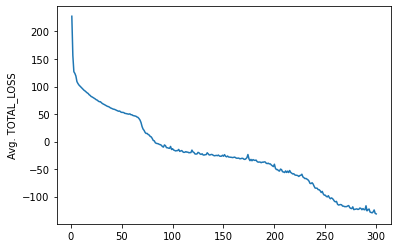

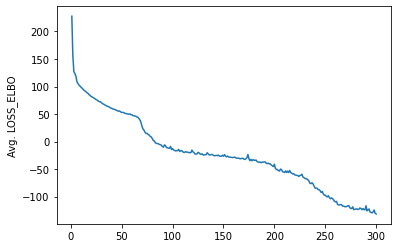

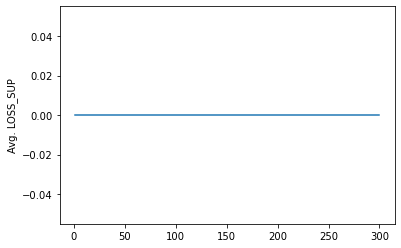

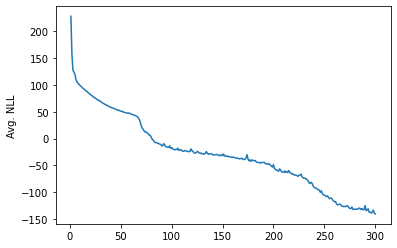

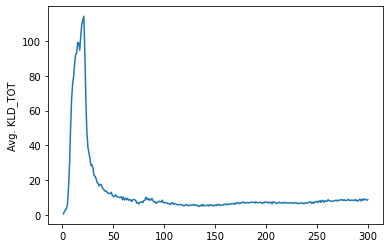

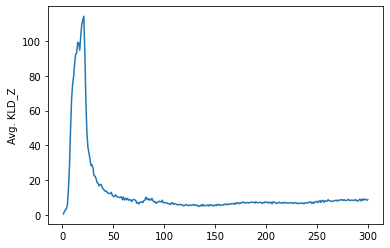

In [31]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

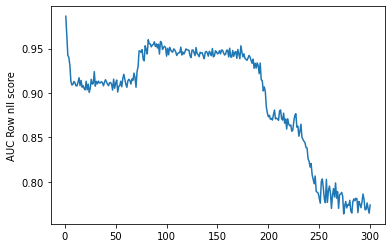

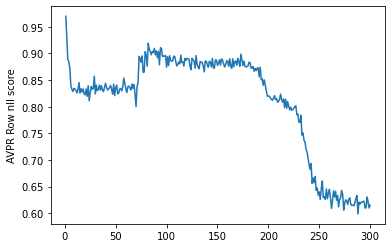

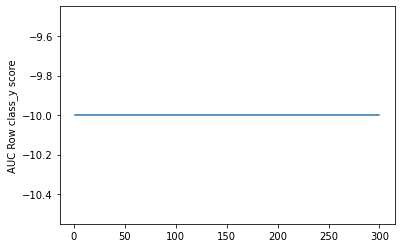

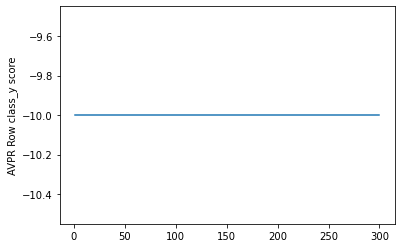

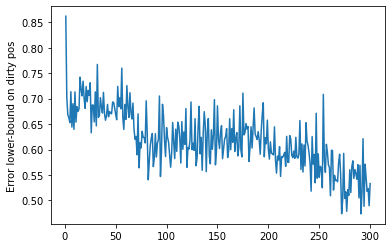

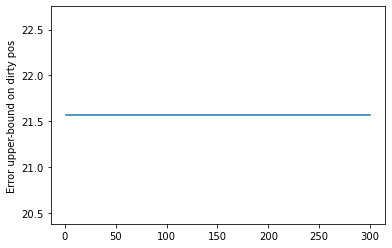

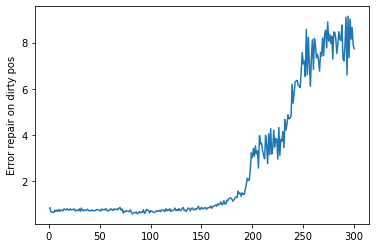

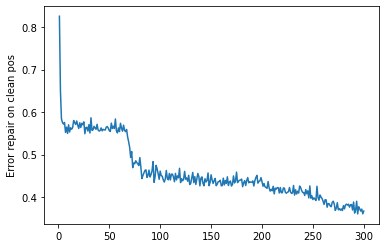

In [32]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

### Plot Validation -- Losses

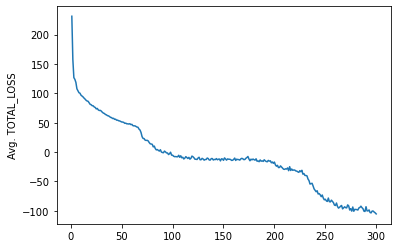

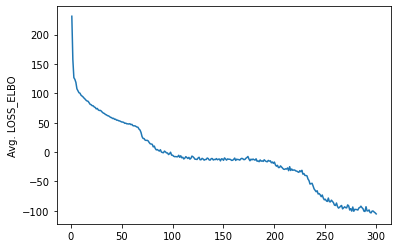

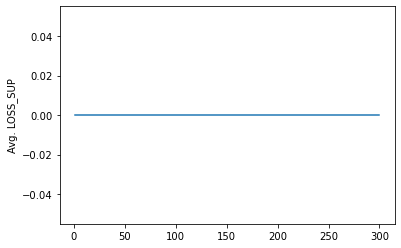

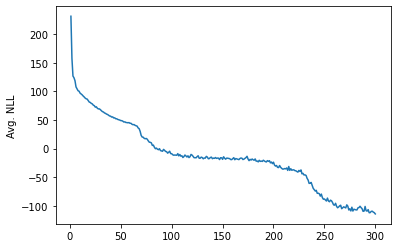

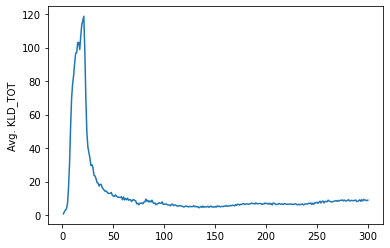

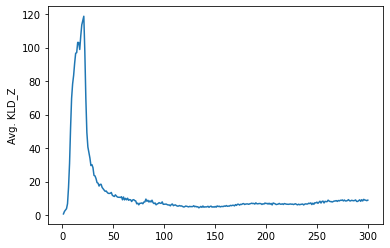

In [33]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

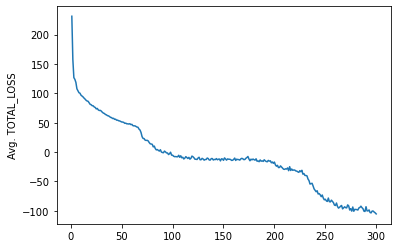

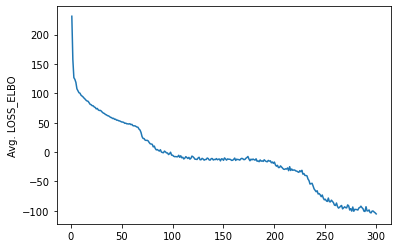

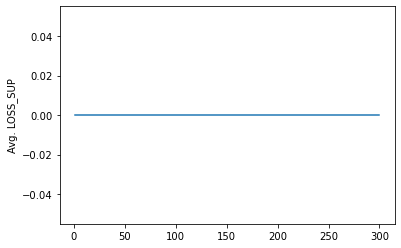

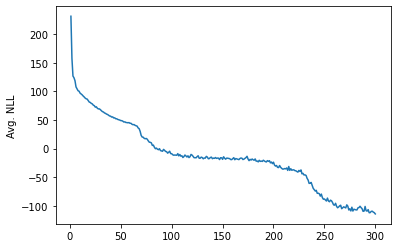

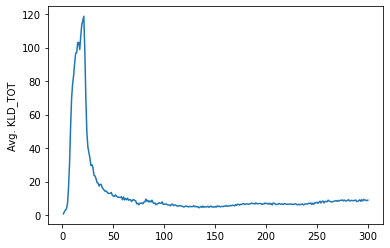

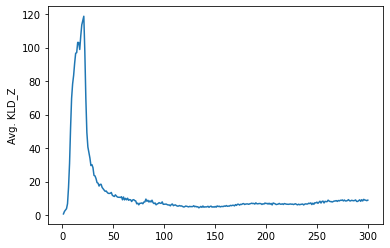

In [34]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [35]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy()


In [36]:
# Show recon logvar
vae_p_params_xd['recon']['logvar_x'].exp()

tensor([0.2292], grad_fn=<ExpBackward>)

In [37]:
# Show mu and covariance values

z_train_mu = vae_q_params['z']['mu'].detach().cpu().numpy()
z_train_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy())

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_var, axis=0)))
print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_mu, axis=0)))


median of variances (per dim), clean: 
 [0.00700159 0.96923554 0.99952924 0.95546377 0.94724715 1.0282218
 0.9675552  0.9922482  0.99311316 1.0287826  0.00462121 0.96828175
 0.9608135  0.9769665  1.0214545 ] 

median of means (per dim), clean: 
 [-1.23578    -0.03217142 -0.01880192  0.02023356  0.02675829 -0.00713624
  0.02932108 -0.00647309 -0.02537388 -0.01564053 -0.32738483 -0.02461996
  0.00323995  0.01891387 -0.04001718] 



### Recons

In [38]:
recon_imgs_train = recons_train.reshape(-1,28,20)*dataset_obj.cont_stds + dataset_obj.cont_means

In [39]:
dataset_obj.cont_means

154.0488358778626

In [40]:
dataset_obj.cont_stds

48.54248012196572

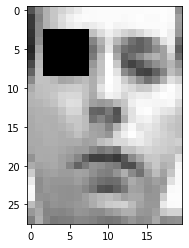

In [76]:
# Show image from train dataset

plt.imshow(x_train_orig[546], cmap="gray",)

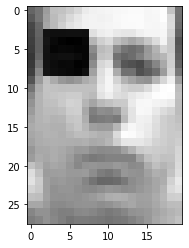

In [42]:
# Show image reconstruction from VAE model

plt.imshow(np.around(recon_imgs_train[546]), cmap="gray", )

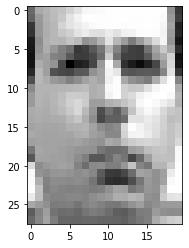

In [77]:
# Show image from train dataset

plt.imshow(x_train_orig[540], cmap="gray",)

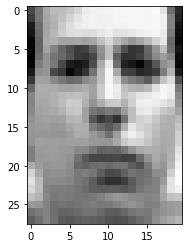

In [78]:
# Show image reconstruction from VAE model

plt.imshow(recon_imgs_train[540], cmap="gray",)

### Show Clean Datapoints at Random

y_noise: 0


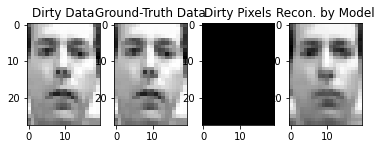

y_noise: 0


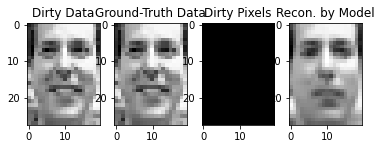

y_noise: 0


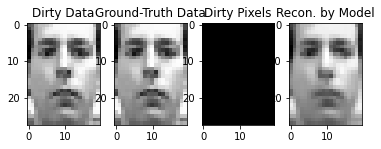

y_noise: 0


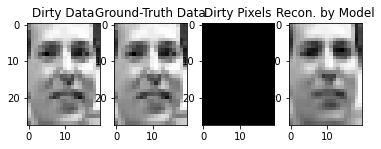

y_noise: 0


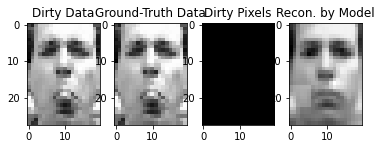

y_noise: 0


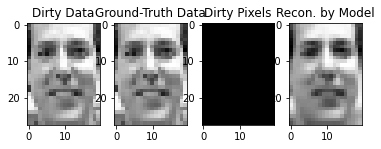

y_noise: 0


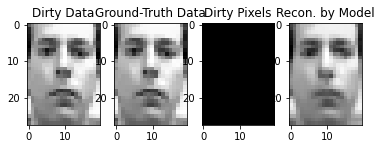

y_noise: 0


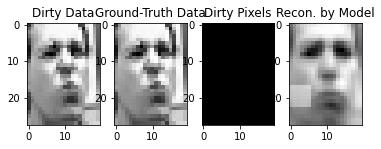

y_noise: 0


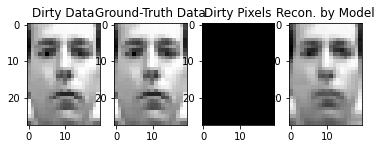

y_noise: 0


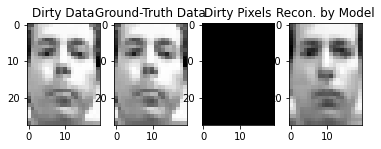

y_noise: 0


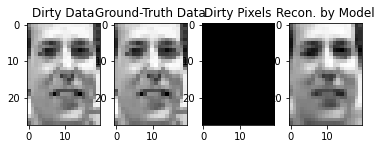

y_noise: 0


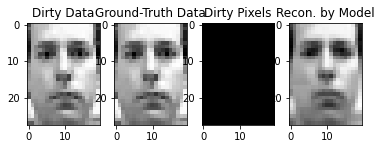

y_noise: 0


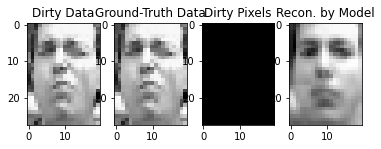

y_noise: 0


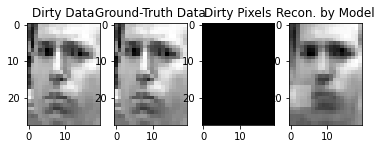

y_noise: 0


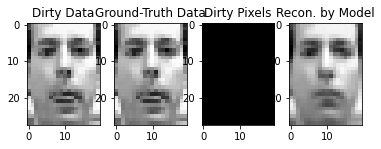

y_noise: 0


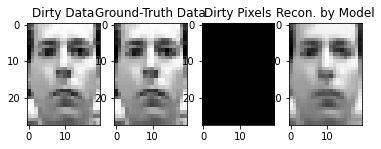

y_noise: 0


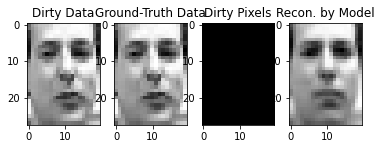

y_noise: 0


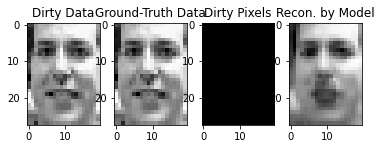

y_noise: 0


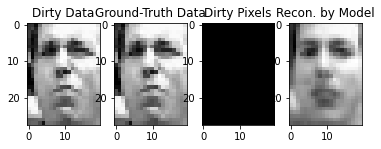

y_noise: 0


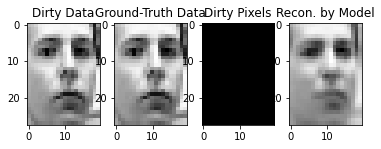

y_noise: 0


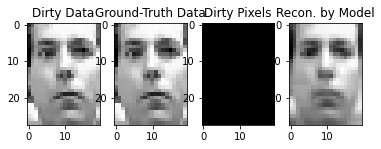

y_noise: 0


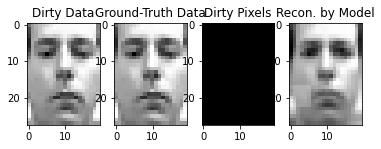

y_noise: 0


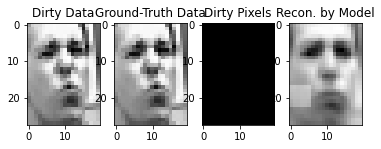

y_noise: 0


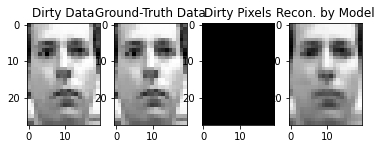

y_noise: 0


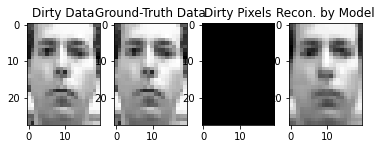

In [45]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Dirty Datapoints at Random

y_noise: 1


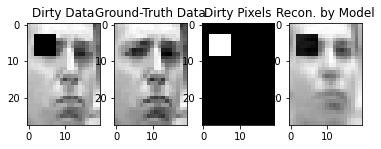

y_noise: 1


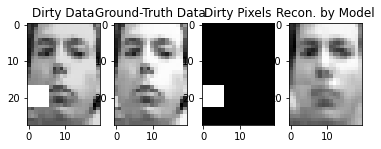

y_noise: 1


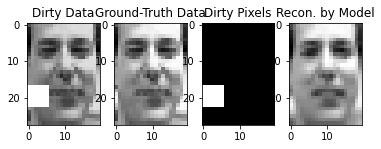

y_noise: 1


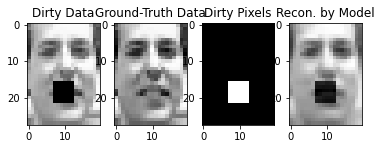

y_noise: 1


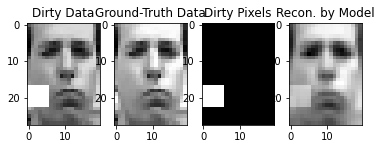

y_noise: 1


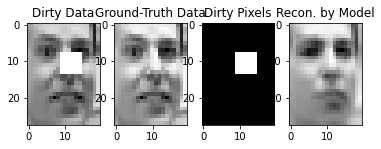

y_noise: 1


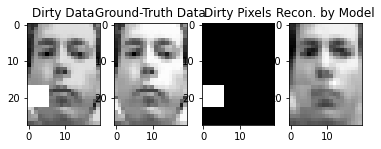

y_noise: 1


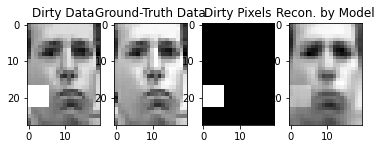

y_noise: 1


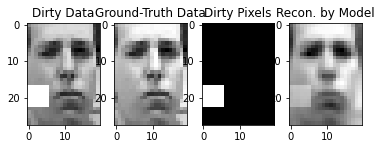

y_noise: 1


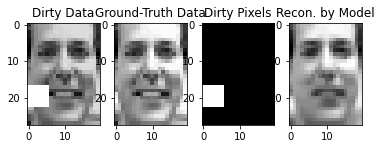

y_noise: 1


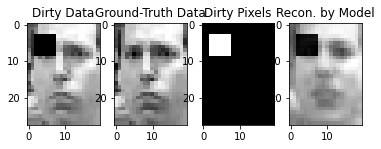

y_noise: 1


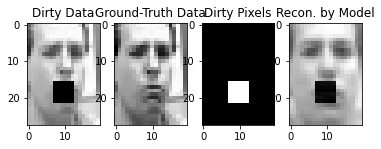

y_noise: 1


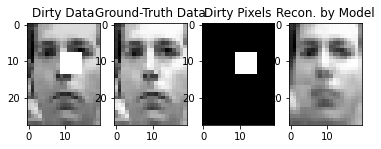

y_noise: 1


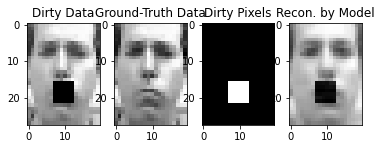

y_noise: 1


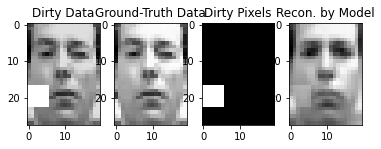

y_noise: 1


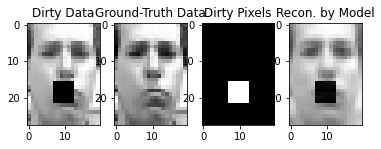

y_noise: 1


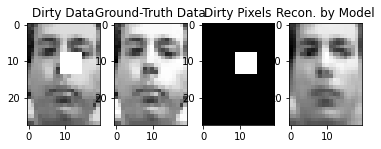

y_noise: 1


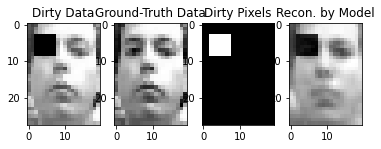

y_noise: 1


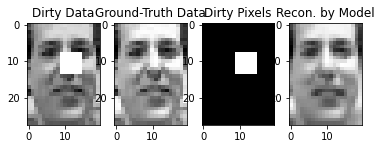

y_noise: 1


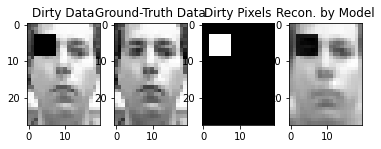

y_noise: 1


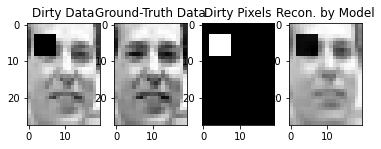

y_noise: 1


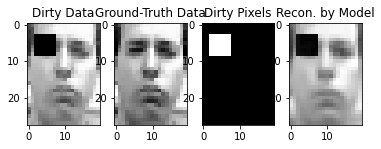

y_noise: 1


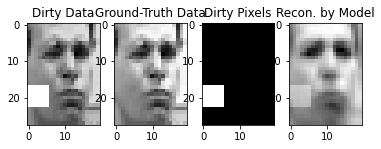

y_noise: 1


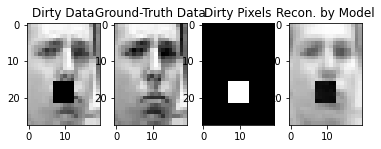

y_noise: 1


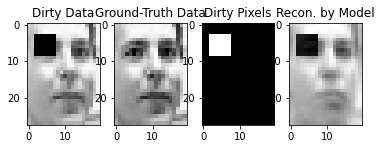

In [46]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show per noise type images: y_noise_lists or y_noise_dict

Noise Tag: 0
Noise Indices: 
[932, 474, 203, 1513, 1003, 1530, 303, 546, 1071, 760, 429, 1418, 1083, 287, 1348, 1140, 330, 1386, 885, 331, 895, 33, 705, 698, 558, 1427, 843, 1193, 746, 867, 1500, 671, 1415, 1130, 1304, 129, 937, 1118, 1372, 422, 523, 261, 1397, 1152, 953, 1349, 271, 872, 928, 779, 173, 1166, 21, 454, 399, 1391, 894, 797, 561, 1145, 1081, 1195, 554, 1554, 1208, 1317, 253, 6, 670, 1390, 456, 1550, 1061, 1436, 1199, 1232, 1562, 1339, 1393, 681, 1213, 248, 1244, 424, 92, 350, 1485, 919, 1279, 225, 644, 552, 179, 1464, 355, 403, 25, 88, 1478, 852, 854, 1139, 909, 1503, 148, 348, 1157, 300, 1340, 688, 916, 436, 1337, 112, 956, 347, 724, 265, 356, 1137, 817, 619, 929, 962, 368, 335, 1205, 259, 1553, 689]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


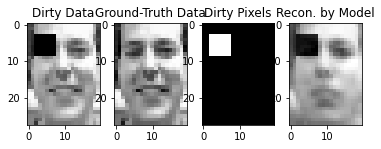

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


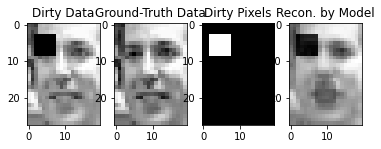

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


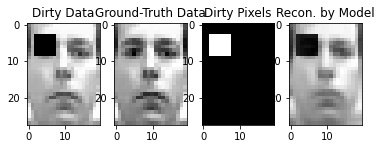

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


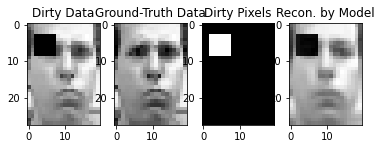

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


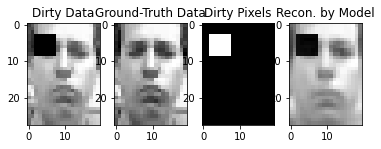

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


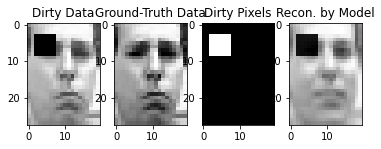

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


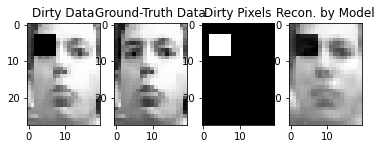

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


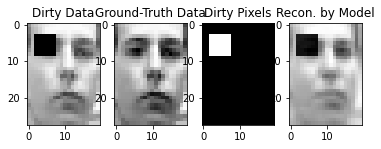

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


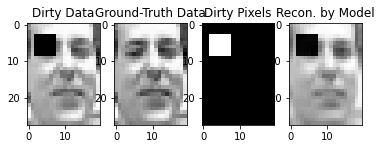

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


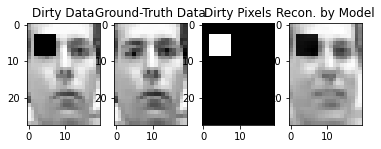







Noise Tag: 1
Noise Indices: 
[930, 1476, 650, 161, 45, 2, 1198, 1434, 616, 614, 150, 651, 162, 661, 1063, 100, 631, 1050, 328, 1128, 798, 1057, 1033, 1255, 384, 604, 756, 487, 816, 612, 1188, 493, 1214, 1223, 44, 1456, 636, 205, 164, 998, 1510, 295, 157, 773, 765, 1571, 8, 1266, 1173, 1442, 755, 1009, 1315, 1481, 396, 1286, 726, 1067, 1225, 250, 1566, 362, 800, 559, 1408, 483, 435, 841, 431, 70, 82, 514, 444, 34, 738, 234, 1169, 1074, 332, 570, 1020, 1264, 1399, 673, 1471, 1480, 397, 1298, 1398, 393, 1068, 499, 383, 116, 195, 196, 562, 281, 90, 1141, 1345, 285, 1184, 1191, 1330, 511, 305, 55, 1370, 473, 1552, 238, 278, 969, 1238, 1175, 732, 439, 402, 1319, 1308, 740, 188, 898, 596, 1116, 1343, 741, 1289, 211, 1196, 140, 1551, 1302, 1248, 1375, 730, 1052, 1377, 923, 1565, 1189, 1010, 450]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


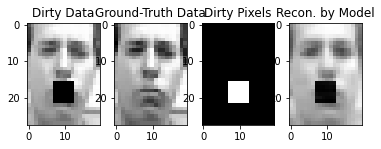

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


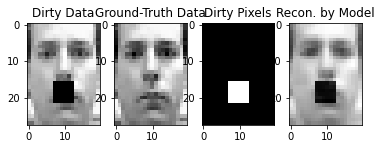

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


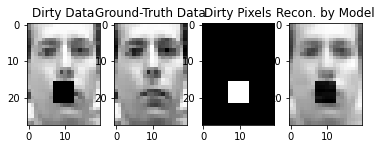

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


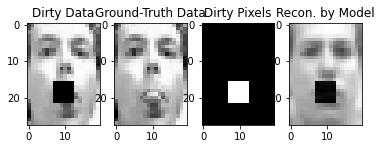

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


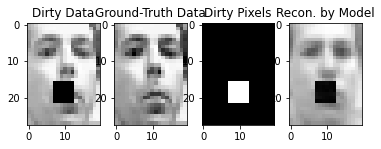

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


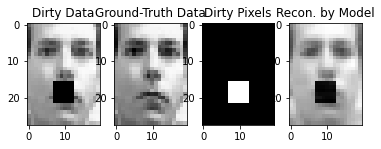

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


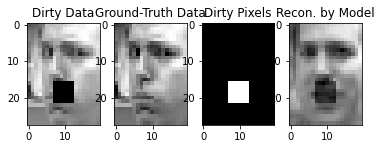

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


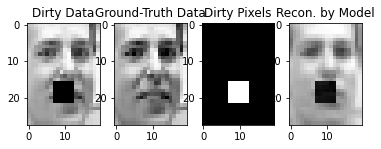

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


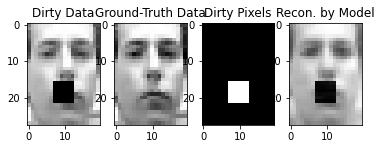

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


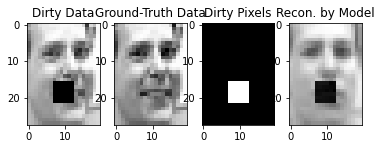







Noise Tag: 2
Noise Indices: 
[1004, 1093, 491, 252, 711, 1075, 1463, 68, 1369, 433, 158, 997, 375, 412, 1455, 1428, 597, 340, 7, 336, 538, 543, 390, 657, 500, 1371, 1096, 322, 957, 154, 10, 993, 13, 128, 497, 1546, 1406, 821, 121, 1262, 130, 1056, 676, 757, 634, 1328, 678, 1097, 1534, 708, 955, 795, 679, 943, 310, 587, 1525, 381, 859, 1219, 653, 857, 220, 57, 981, 451, 982, 845, 254, 411, 806, 582, 1030, 477, 1127, 298, 169, 42, 1462, 563, 1441, 547, 1103, 588, 663, 1294, 739, 759, 1338, 864, 703, 1438, 1320, 959, 617, 366, 938, 279, 1265, 1517, 319, 526, 1099, 96, 1007, 702, 472, 530, 1186, 230, 1104, 989, 822, 1569, 949, 1240, 1332, 975, 579, 1107, 1488, 1060, 1037, 625, 1494, 327, 1153, 379, 1300, 788, 176, 1344, 1496, 1042, 1439]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


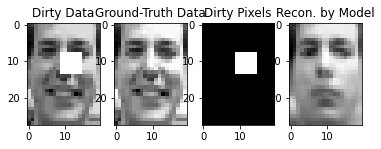

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


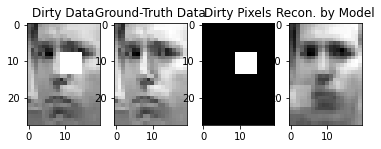

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


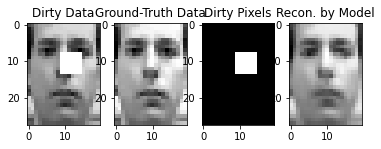

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


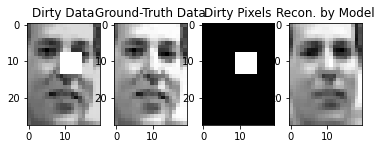

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


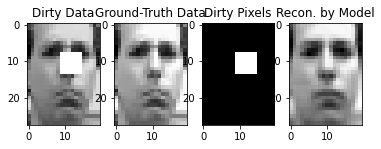

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


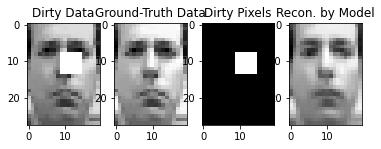

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


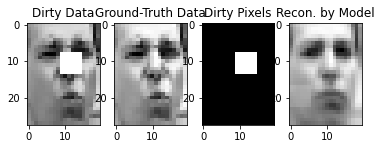

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


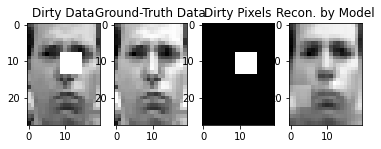

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


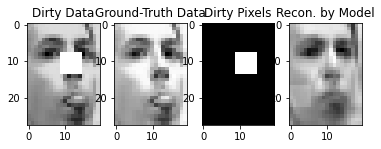

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


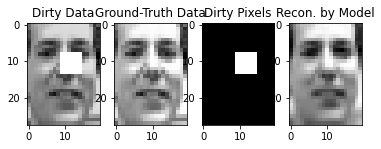







Noise Tag: 3
Noise Indices: 
[1079, 577, 476, 359, 312, 155, 1234, 388, 805, 231, 1498, 723, 1110, 1489, 633, 457, 308, 507, 1411, 697, 1365, 496, 1564, 1258, 525, 1101, 1172, 920, 181, 510, 1149, 1284, 27, 1417, 555, 1158, 413, 1201, 486, 802, 1549, 1402, 731, 1283, 437, 52, 245, 1251, 1453, 1531, 1380, 72, 753, 1495, 865, 288, 1492, 823, 660, 694, 1334, 1105, 1041, 210, 223, 520, 882, 110, 200, 1394, 1029, 835, 339, 301, 373, 296, 466, 1220, 1429, 1049, 1027, 1069, 1087, 896, 349, 1292, 907, 395, 1025, 1364, 1314, 830, 1414, 275, 601, 542, 191, 11, 1506, 446, 967, 360, 1072, 3, 40, 785, 808, 1450, 1121, 1293, 463, 610, 434, 803, 539, 479, 316, 1170, 1167, 1341, 700, 970, 1085, 971, 573]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


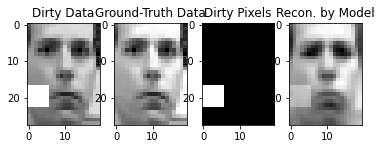

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


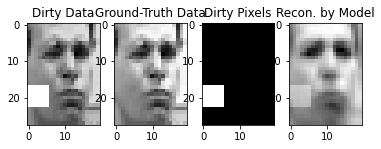

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


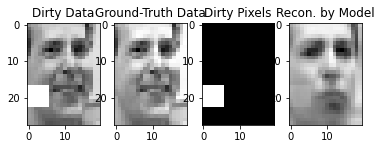

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


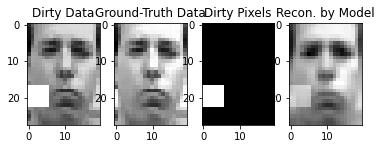

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


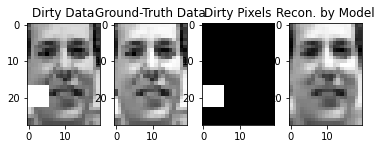

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


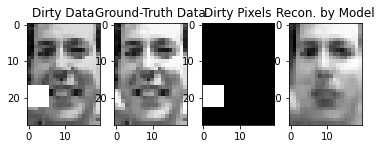

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


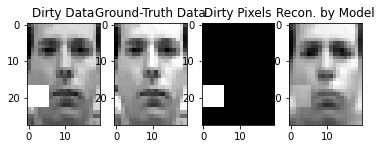

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


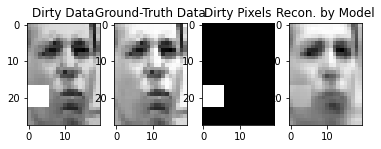

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


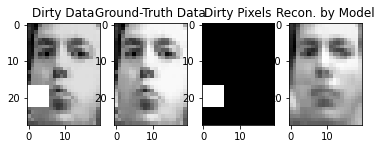

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


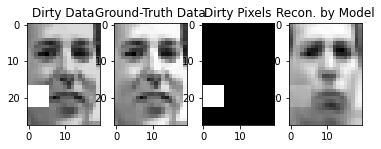

In [47]:
## show per noise type images: y_noise_lists or y_noise_dict

max_show_n = 10

for noise_key, noise_idxs in y_noise_dict_train.items():
    
    print("Noise Tag: {}".format(noise_key))
    print("Noise Indices: \n{}".format(noise_idxs))
    
    _selected_idxs = np.random.permutation(noise_idxs)[:max_show_n]
    
    for idx in _selected_idxs:
    
        print("y_class (clean): {} | y_noise: {} | y_noise_tag (noise type): {}".format(
            0, y_noise_instance_train[idx], noise_key)) # y_class_train[idx]
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(x_train_orig[idx,...],cmap="gray")
        ax[0].set_title("Dirty Data")
        ax[1].imshow(x_train_clean_orig[idx,...],cmap="gray")
        ax[1].set_title("Ground-Truth Data")
        ax[2].imshow(y_noise_pixels_train[idx,...],cmap="gray")
        ax[2].set_title("Dirty Pixels")
        #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].set_title("Recon. by Model")
        plt.show()
        
    print("\n\n\n\n\n")



In [48]:
len(trusted_idxs_train)

250

### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

y_noise: 0


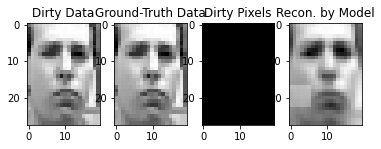

y_noise: 0


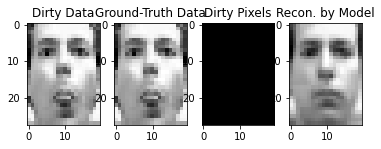

y_noise: 0


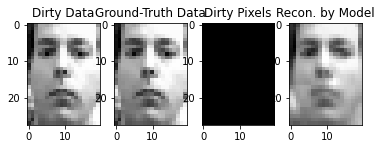

y_noise: 0


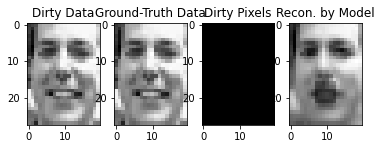

y_noise: 0


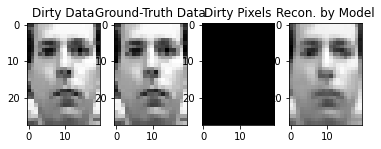

y_noise: 0


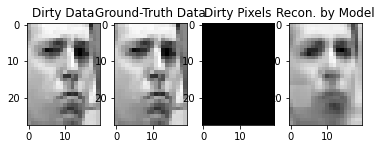

y_noise: 0


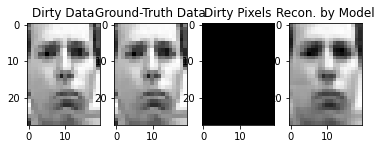

y_noise: 0


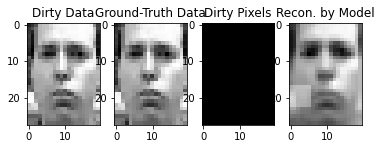

y_noise: 0


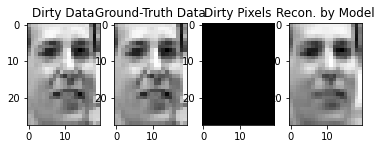

y_noise: 0


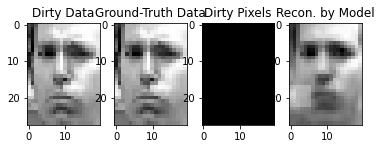

y_noise: 0


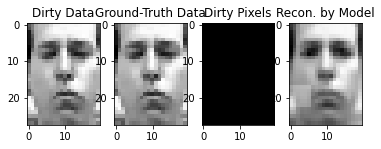

y_noise: 0


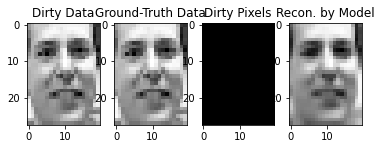

y_noise: 0


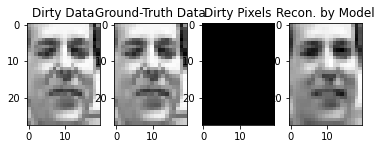

y_noise: 0


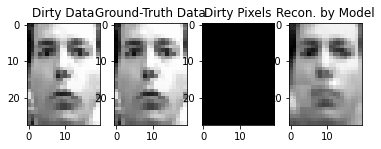

y_noise: 0


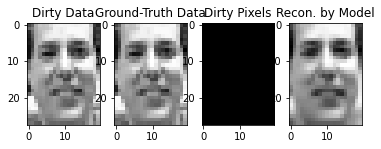

y_noise: 0


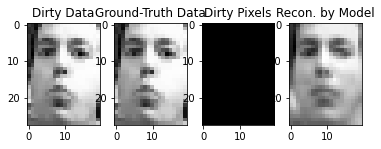

y_noise: 0


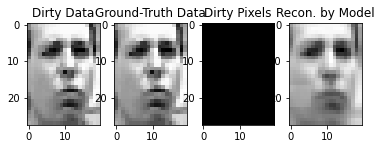

y_noise: 0


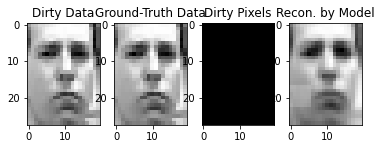

y_noise: 0


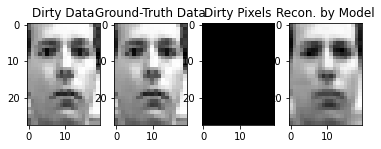

y_noise: 0


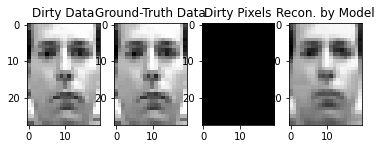

y_noise: 0


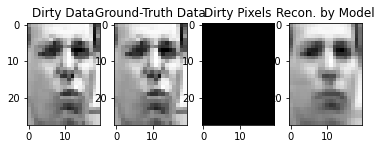

y_noise: 0


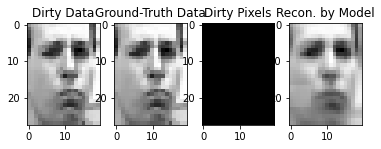

y_noise: 0


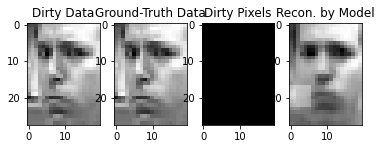

y_noise: 0


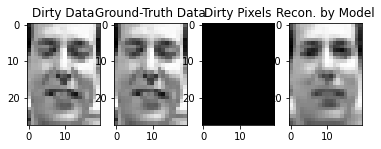

y_noise: 0


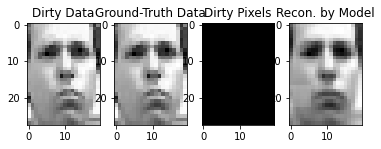

y_noise: 0


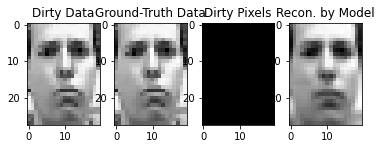

y_noise: 0


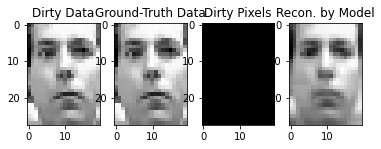

y_noise: 0


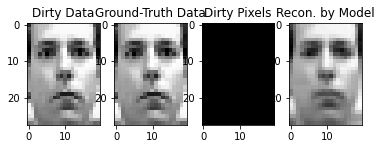

y_noise: 0


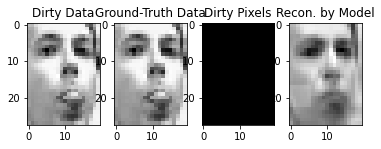

y_noise: 0


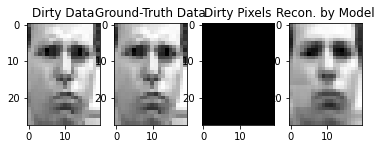

y_noise: 0


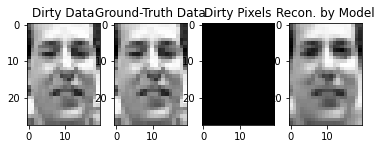

y_noise: 0


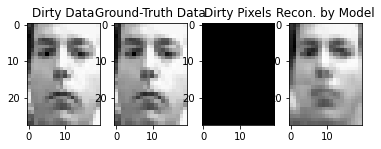

y_noise: 0


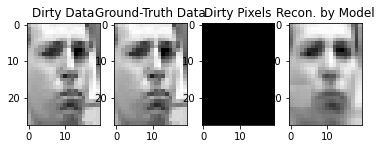

y_noise: 0


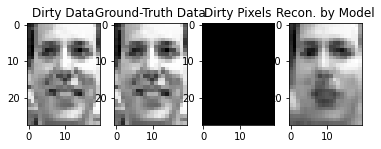

y_noise: 0


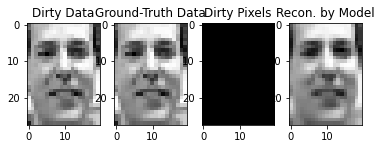

y_noise: 0


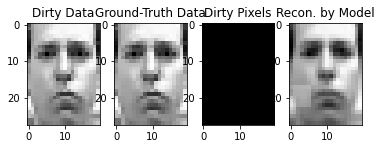

y_noise: 0


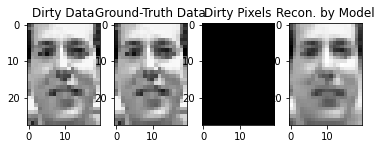

y_noise: 0


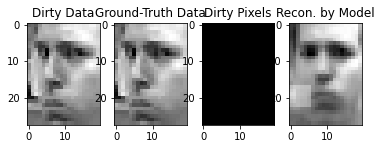

y_noise: 0


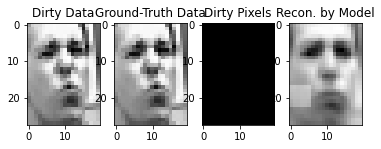

y_noise: 0


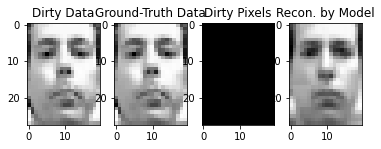

y_noise: 0


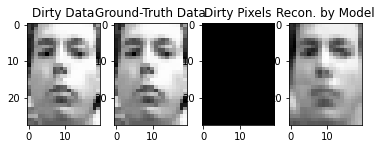

y_noise: 0


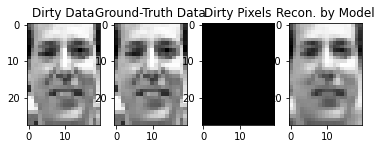

y_noise: 0


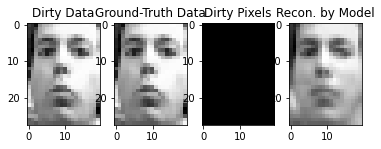

y_noise: 0


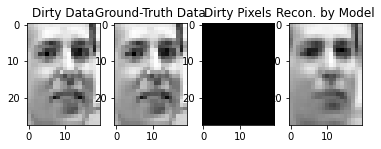

y_noise: 0


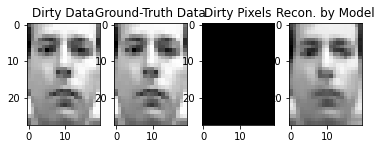

y_noise: 0


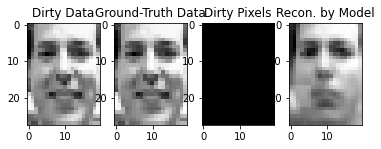

y_noise: 0


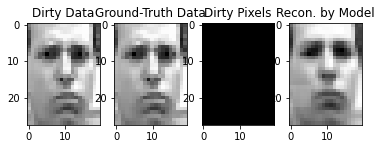

y_noise: 0


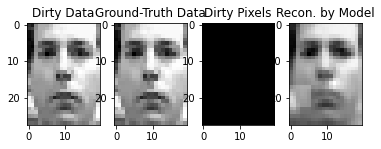

y_noise: 0


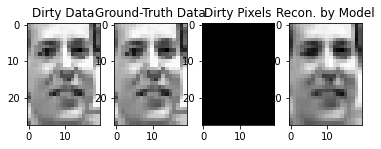

y_noise: 0


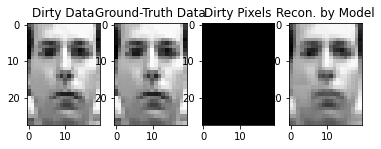

y_noise: 1


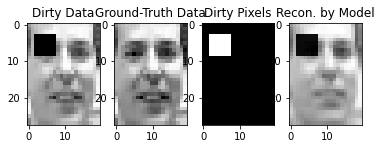

y_noise: 1


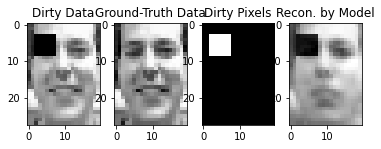

y_noise: 1


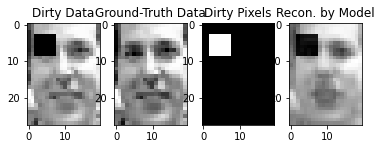

y_noise: 1


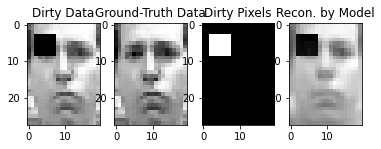

y_noise: 1


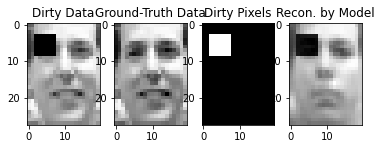

y_noise: 1


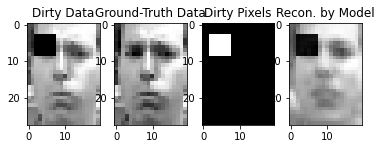

y_noise: 1


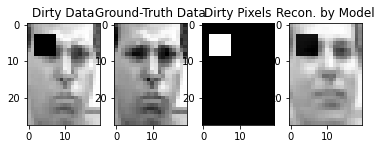

y_noise: 1


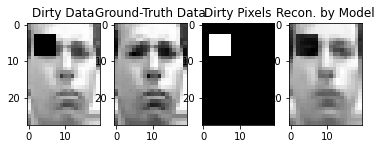

y_noise: 1


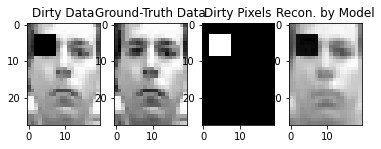

y_noise: 1


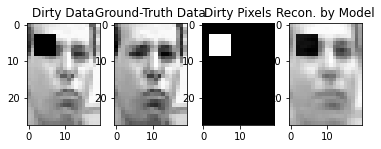

y_noise: 1


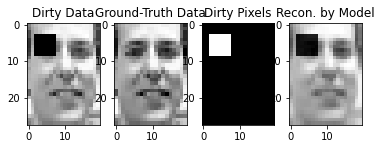

y_noise: 1


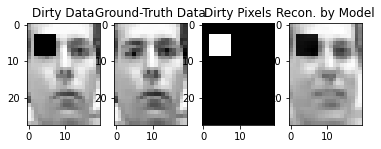

y_noise: 1


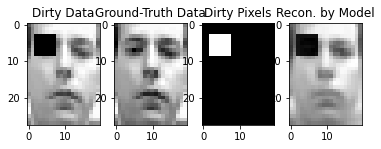

y_noise: 1


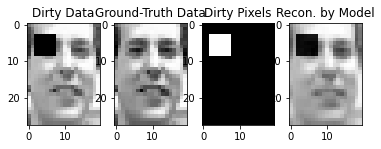

y_noise: 1


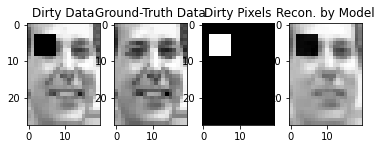

y_noise: 1


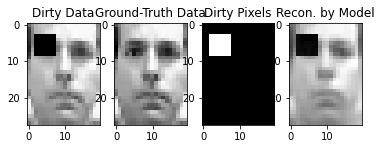

y_noise: 1


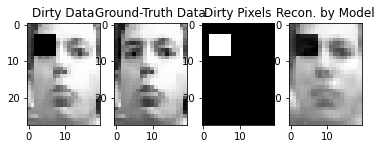

y_noise: 1


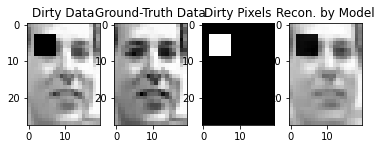

y_noise: 1


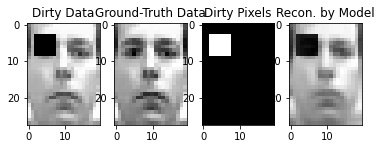

y_noise: 1


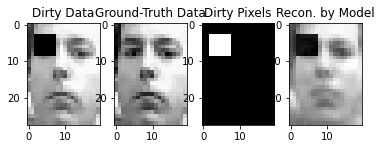

y_noise: 1


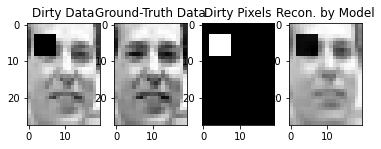

y_noise: 1


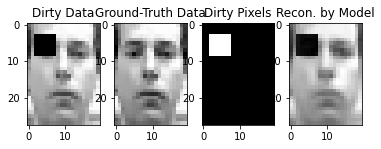

y_noise: 1


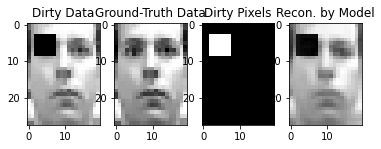

y_noise: 1


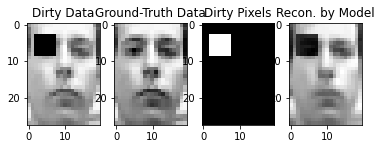

y_noise: 1


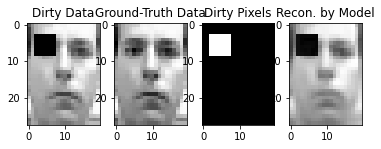

y_noise: 1


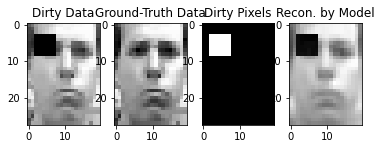

y_noise: 1


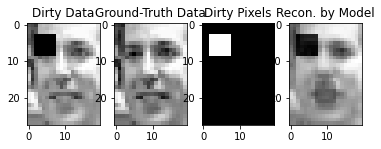

y_noise: 1


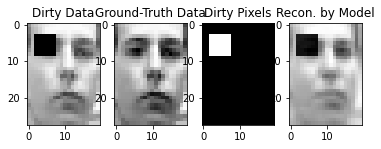

y_noise: 1


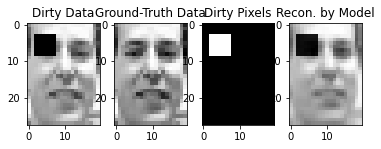

y_noise: 1


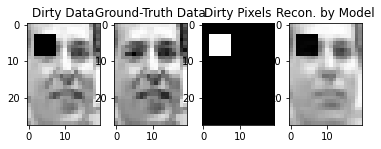

y_noise: 1


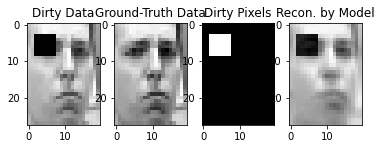

y_noise: 1


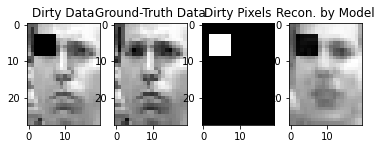

y_noise: 1


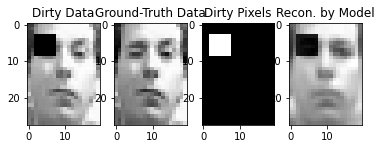

y_noise: 1


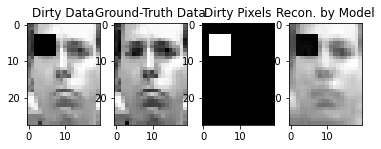

y_noise: 1


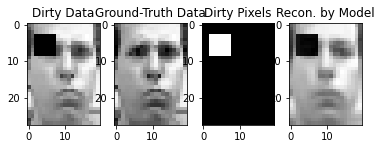

y_noise: 1


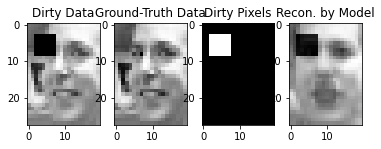

y_noise: 1


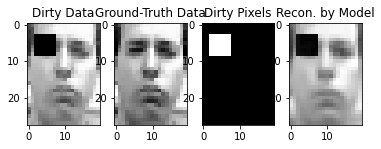

y_noise: 1


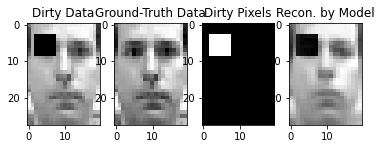

y_noise: 1


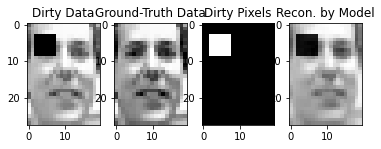

y_noise: 1


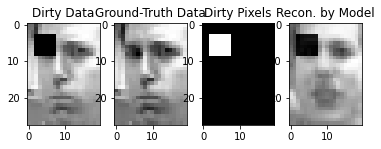

y_noise: 1


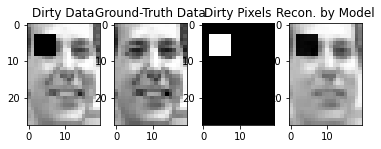

y_noise: 1


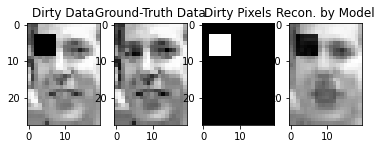

y_noise: 1


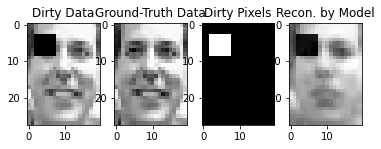

y_noise: 1


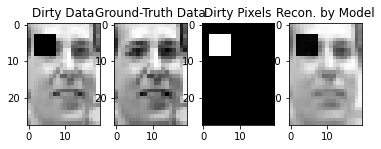

y_noise: 1


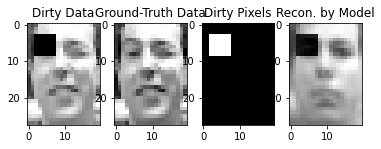

y_noise: 1


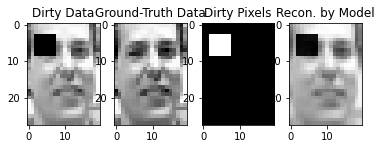

y_noise: 1


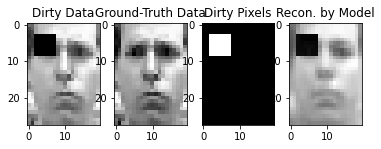

y_noise: 1


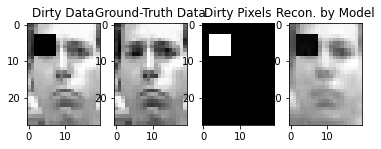

y_noise: 1


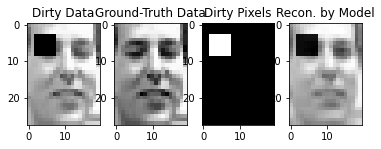

y_noise: 1


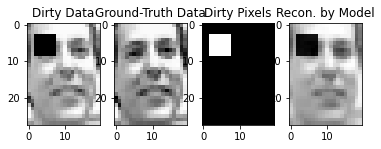

y_noise: 1


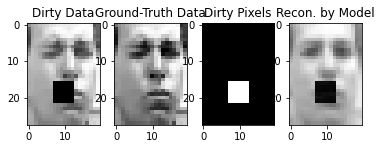

y_noise: 1


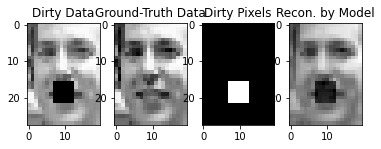

y_noise: 1


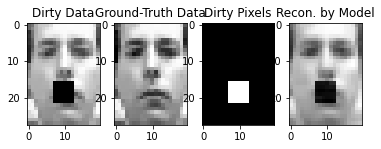

y_noise: 1


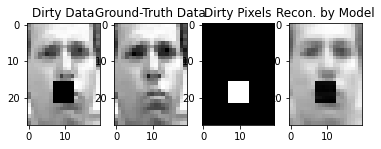

y_noise: 1


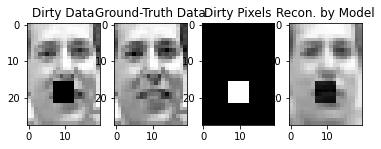

y_noise: 1


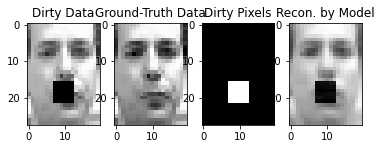

y_noise: 1


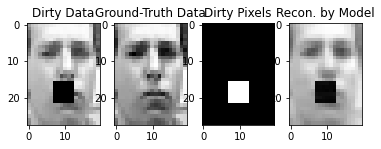

y_noise: 1


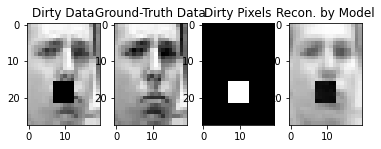

y_noise: 1


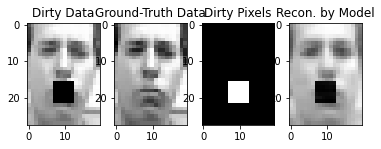

y_noise: 1


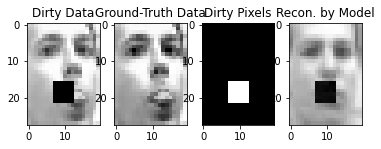

y_noise: 1


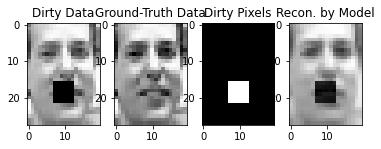

y_noise: 1


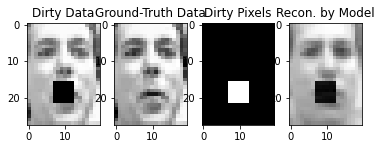

y_noise: 1


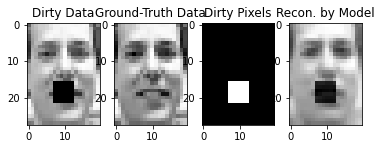

y_noise: 1


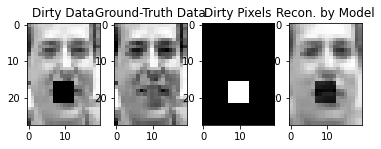

y_noise: 1


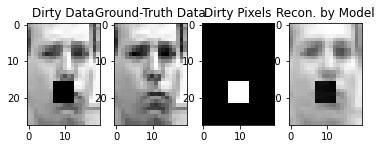

y_noise: 1


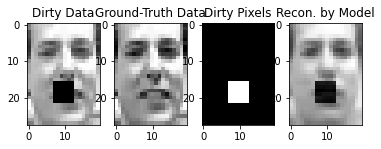

y_noise: 1


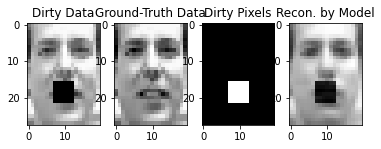

y_noise: 1


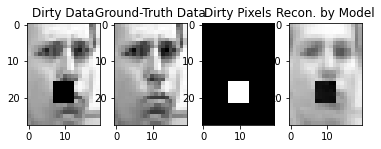

y_noise: 1


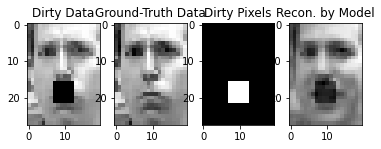

y_noise: 1


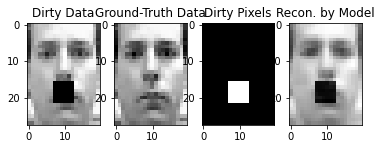

y_noise: 1


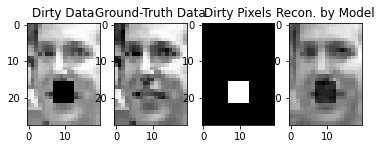

y_noise: 1


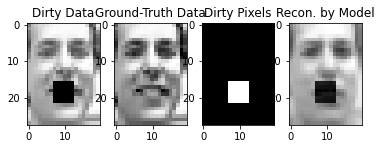

y_noise: 1


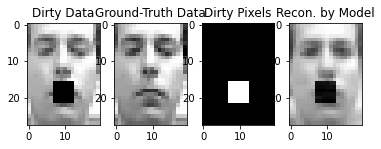

y_noise: 1


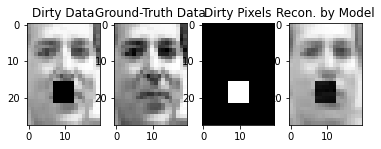

y_noise: 1


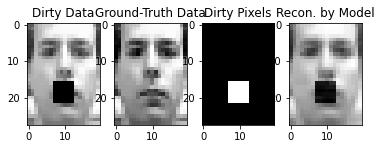

y_noise: 1


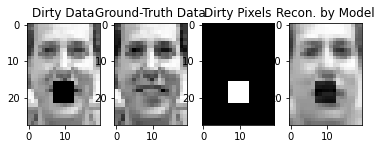

y_noise: 1


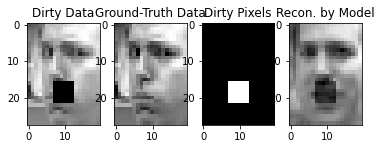

y_noise: 1


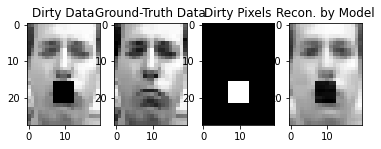

y_noise: 1


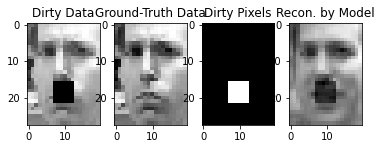

y_noise: 1


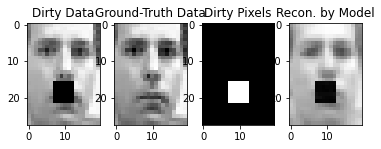

y_noise: 1


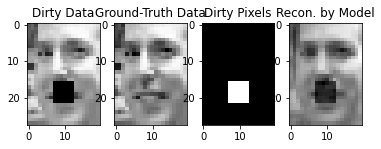

y_noise: 1


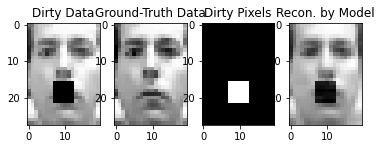

y_noise: 1


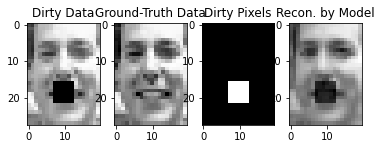

y_noise: 1


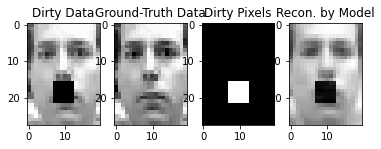

y_noise: 1


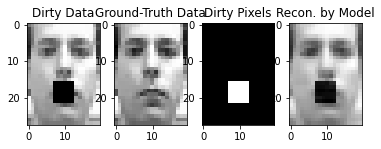

y_noise: 1


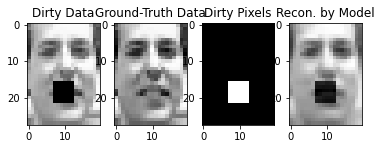

y_noise: 1


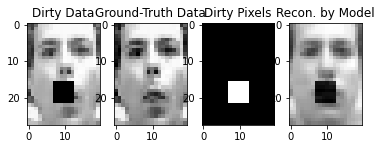

y_noise: 1


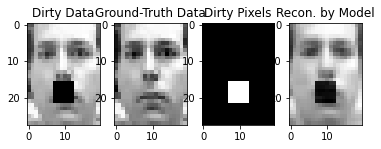

y_noise: 1


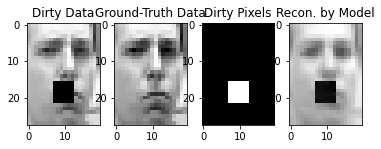

y_noise: 1


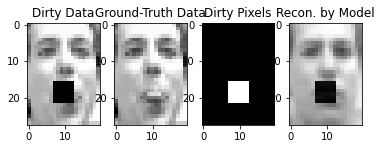

y_noise: 1


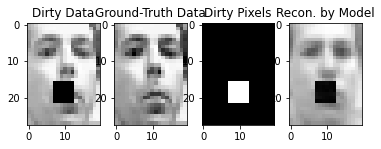

y_noise: 1


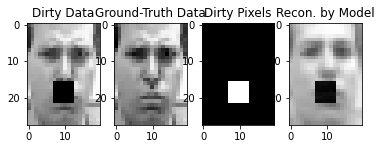

y_noise: 1


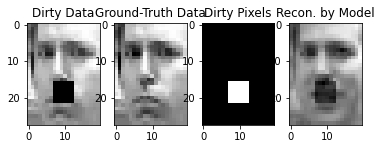

y_noise: 1


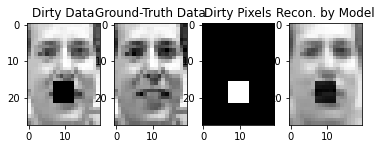

y_noise: 1


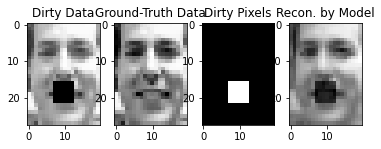

y_noise: 1


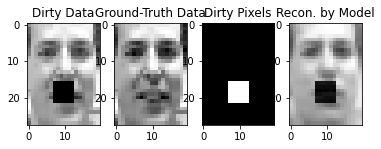

y_noise: 1


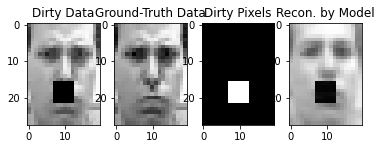

y_noise: 1


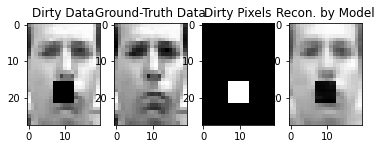

y_noise: 1


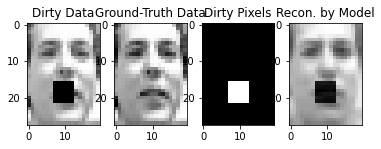

y_noise: 1


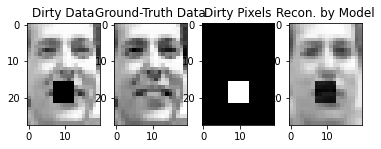

y_noise: 1


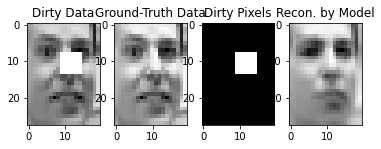

y_noise: 1


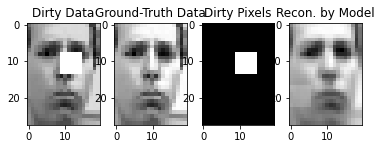

y_noise: 1


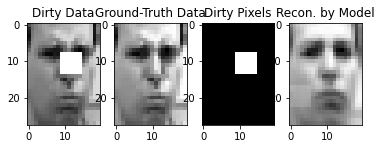

y_noise: 1


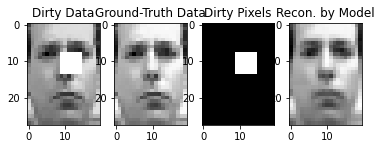

y_noise: 1


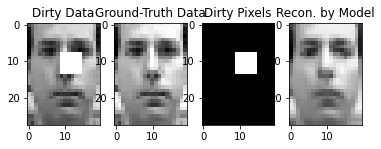

y_noise: 1


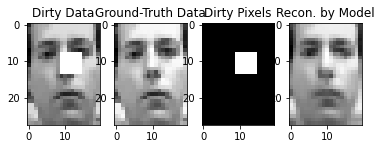

y_noise: 1


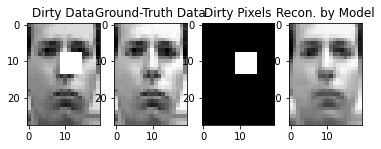

y_noise: 1


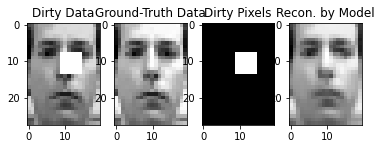

y_noise: 1


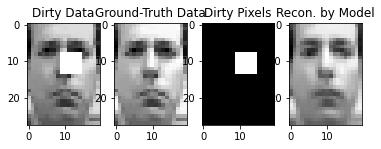

y_noise: 1


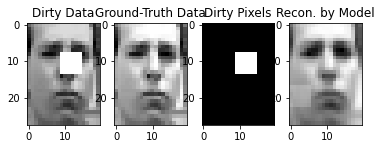

y_noise: 1


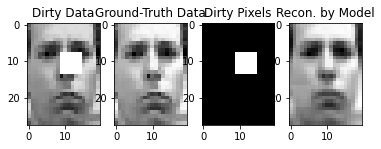

y_noise: 1


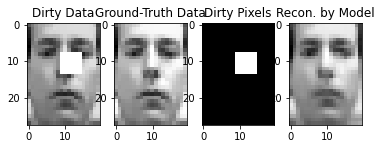

y_noise: 1


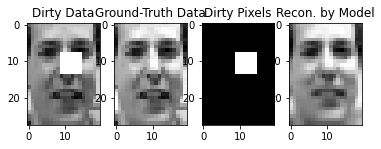

y_noise: 1


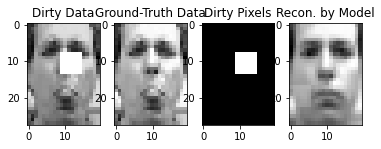

y_noise: 1


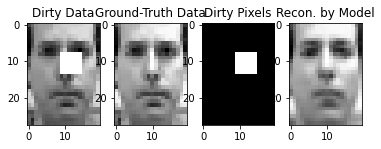

y_noise: 1


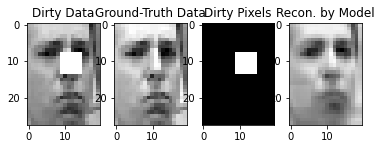

y_noise: 1


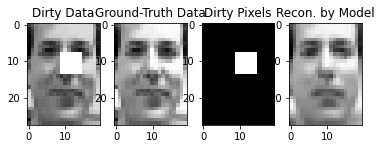

y_noise: 1


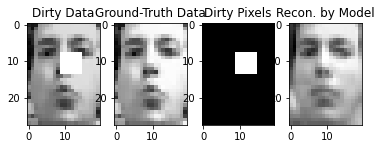

y_noise: 1


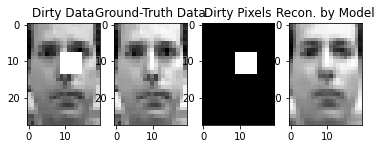

y_noise: 1


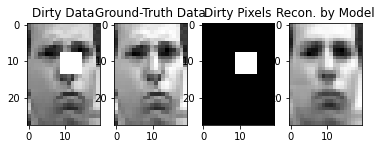

y_noise: 1


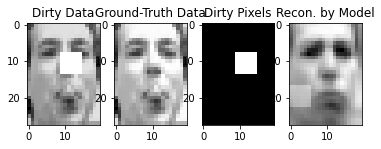

y_noise: 1


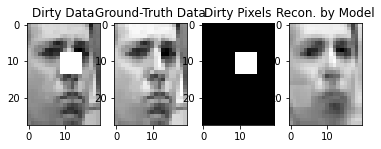

y_noise: 1


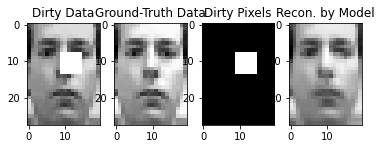

y_noise: 1


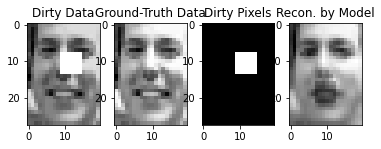

y_noise: 1


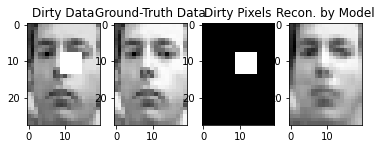

y_noise: 1


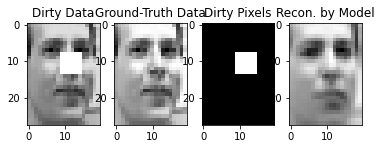

y_noise: 1


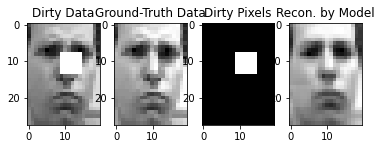

y_noise: 1


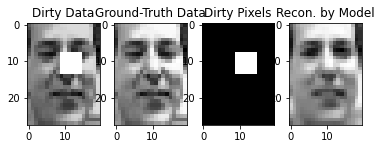

y_noise: 1


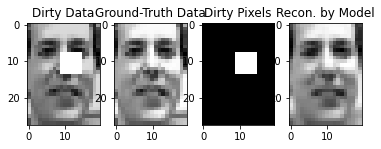

y_noise: 1


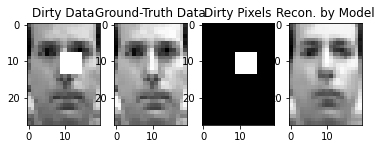

y_noise: 1


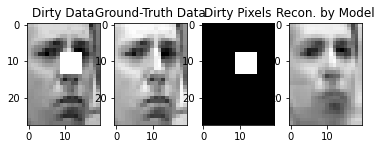

y_noise: 1


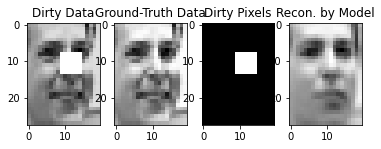

y_noise: 1


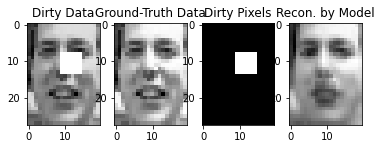

y_noise: 1


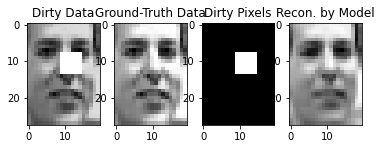

y_noise: 1


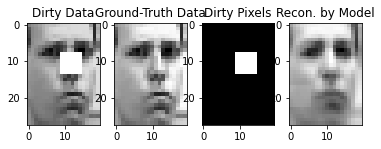

y_noise: 1


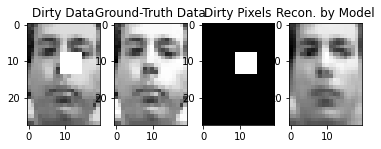

y_noise: 1


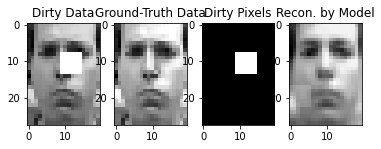

y_noise: 1


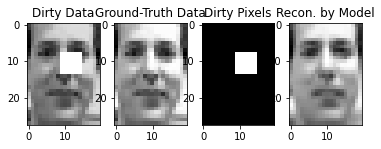

y_noise: 1


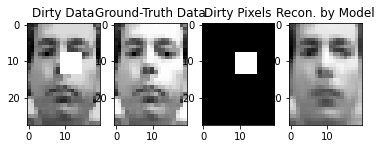

y_noise: 1


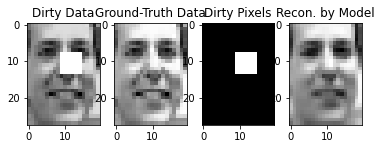

y_noise: 1


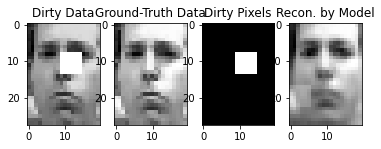

y_noise: 1


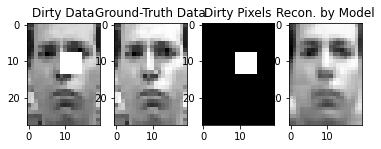

y_noise: 1


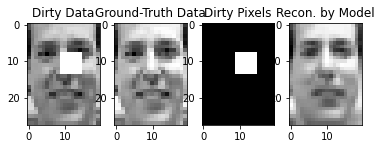

y_noise: 1


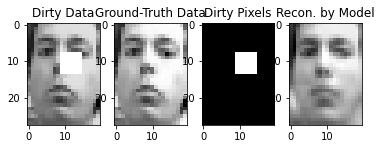

y_noise: 1


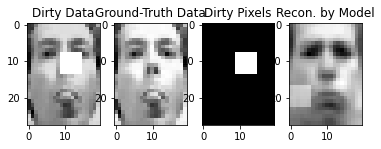

y_noise: 1


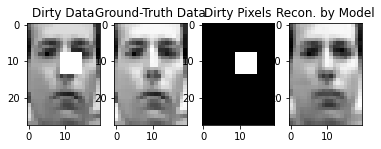

y_noise: 1


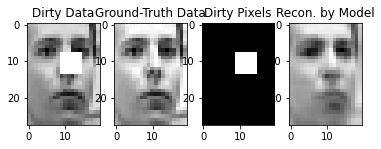

y_noise: 1


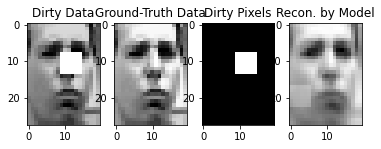

y_noise: 1


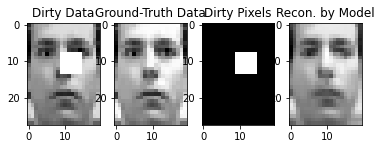

y_noise: 1


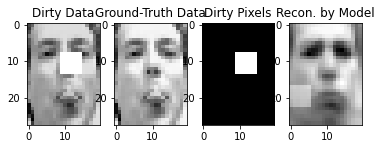

y_noise: 1


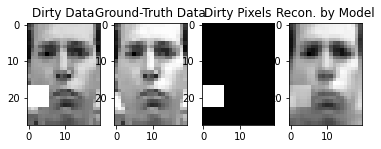

y_noise: 1


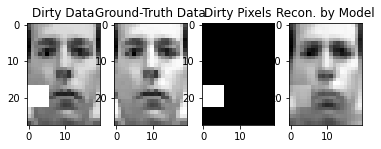

y_noise: 1


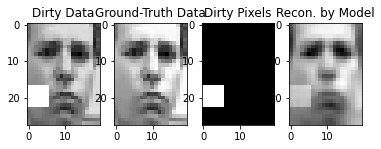

y_noise: 1


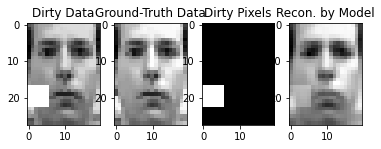

y_noise: 1


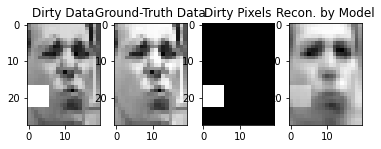

y_noise: 1


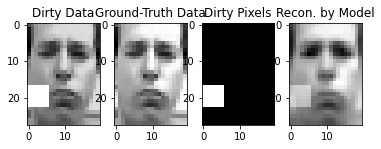

y_noise: 1


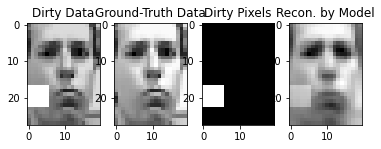

y_noise: 1


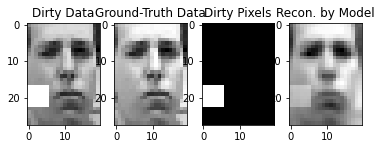

y_noise: 1


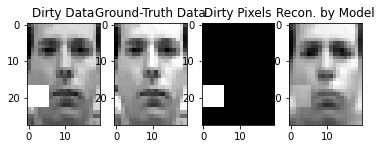

y_noise: 1


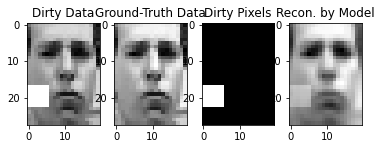

y_noise: 1


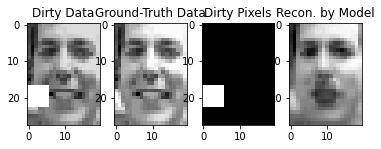

y_noise: 1


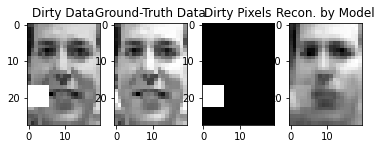

y_noise: 1


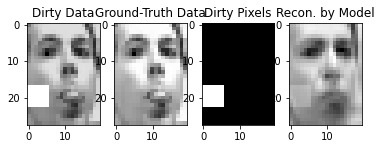

y_noise: 1


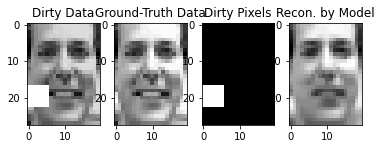

y_noise: 1


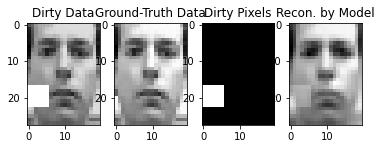

y_noise: 1


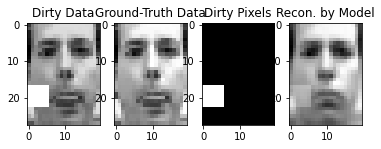

y_noise: 1


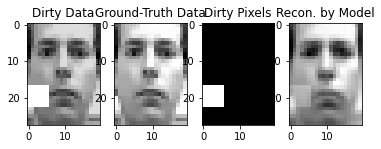

y_noise: 1


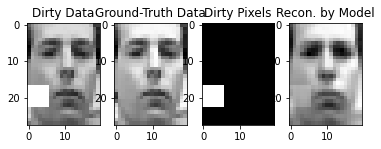

y_noise: 1


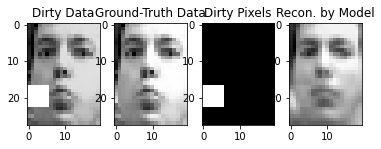

y_noise: 1


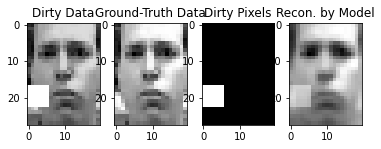

y_noise: 1


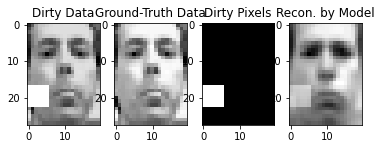

y_noise: 1


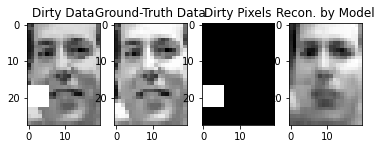

y_noise: 1


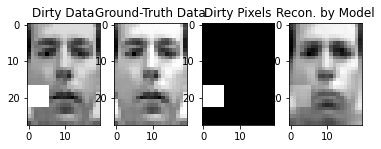

y_noise: 1


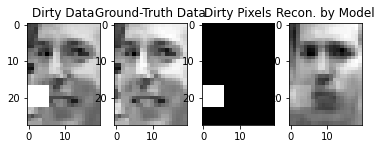

y_noise: 1


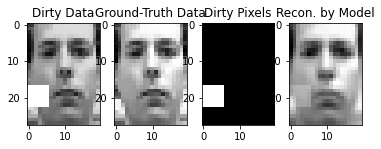

y_noise: 1


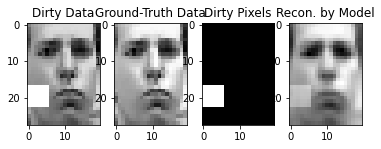

y_noise: 1


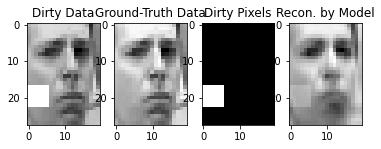

y_noise: 1


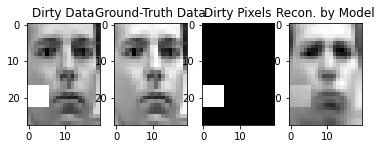

y_noise: 1


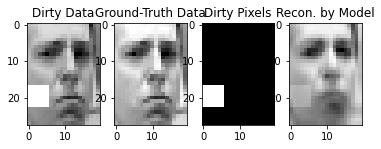

y_noise: 1


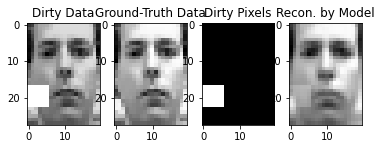

y_noise: 1


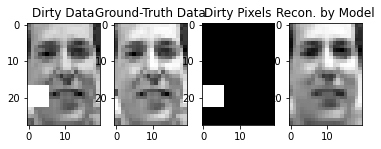

y_noise: 1


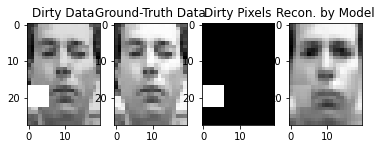

y_noise: 1


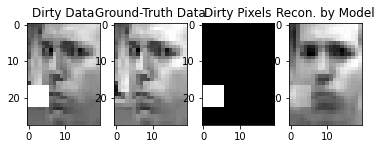

y_noise: 1


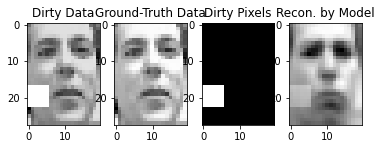

y_noise: 1


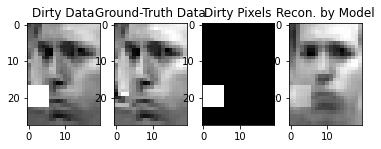

y_noise: 1


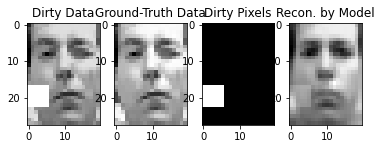

y_noise: 1


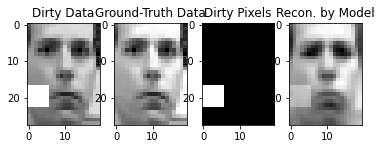

y_noise: 1


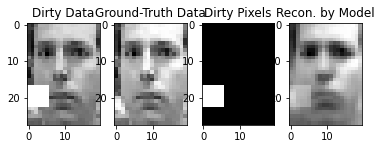

y_noise: 1


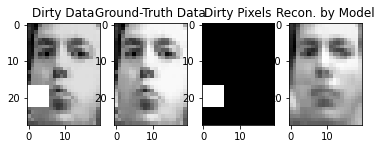

y_noise: 1


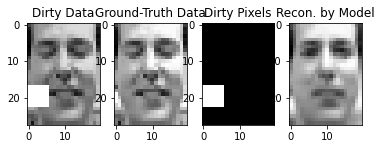

y_noise: 1


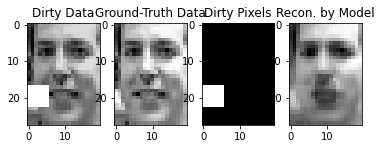

y_noise: 1


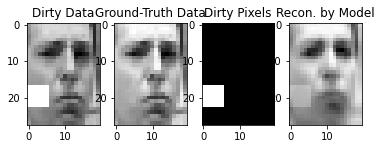

y_noise: 1


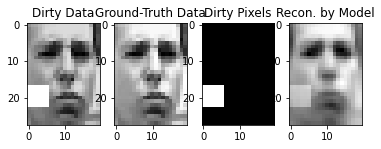

y_noise: 1


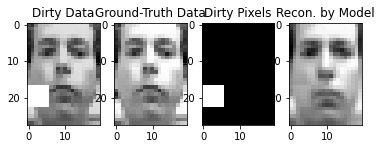

y_noise: 1


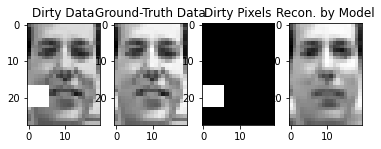

y_noise: 1


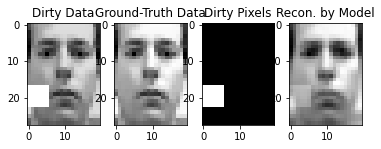

y_noise: 1


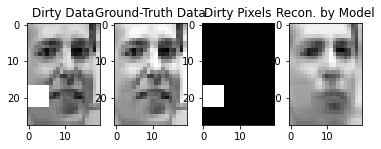

y_noise: 1


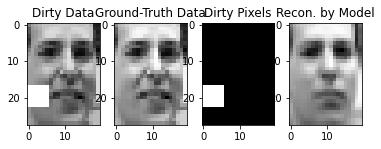

y_noise: 1


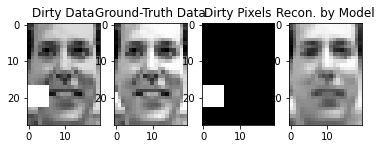

y_noise: 1


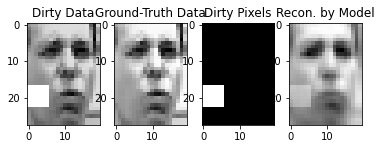

In [49]:
    
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Latent Space

In [50]:
noised_rows = y_noise_instance_train
noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [51]:
from sklearn.decomposition import PCA

# Use underlying clean train data for representation
pca_2d_z = PCA(n_components=2) # PCA
pca_2d_z.fit(z_train_clean)

PCA(n_components=2)

In [52]:
pca_2d_z.explained_variance_

array([4.647667 , 2.5044096], dtype=float32)

In [53]:
z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D) for a clean q(z|x)')

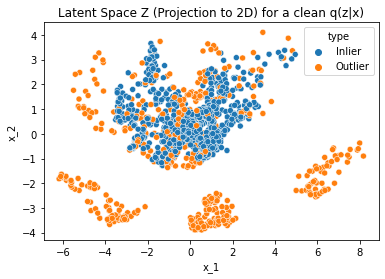

In [54]:
df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
                                   "x_2": z_train_pca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
plt.title("Latent Space Z (Projection to 2D) for a clean q(z|x)")

### Kernel PCA

In [55]:
from sklearn.decomposition import KernelPCA

# Use underlying clean train data for representation
kpca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
kpca_2d_z.fit(z_train_clean)

KernelPCA(degree=5, kernel='rbf', n_components=2)

In [56]:
z_train_kpca2d_clean = kpca_2d_z.transform(z_train_clean)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D) for a clean q(z|x)')

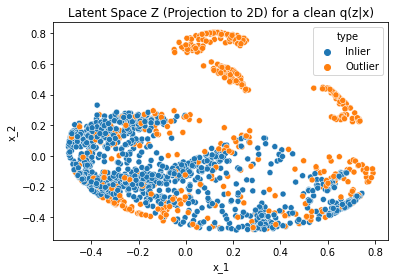

In [57]:
df_plot_z_kpca2d = pd.DataFrame({"x_1": z_train_kpca2d_clean[:,0], 
                                   "x_2": z_train_kpca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d)
plt.title("Latent Space Z (Projection to 2D) for a clean q(z|x)")

#### T-SNE

In [58]:
from sklearn.manifold import TSNE

In [59]:
tsne_2d_z = TSNE(n_components=2, perplexity=250.0, n_iter=5000)
_z_all_2d = tsne_2d_z.fit_transform(z_train_clean)

In [60]:
_len_dataset = z_train_clean.shape[0]
z_train_tsne2d_clean = _z_all_2d

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D) for a clean q(z|x)')

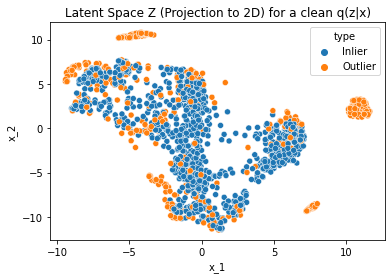

In [61]:
df_plot_z_tsne2d = pd.DataFrame({"x_1": z_train_tsne2d_clean[:,0], 
                                   "x_2": z_train_tsne2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d)
plt.title("Latent Space Z (Projection to 2D) for a clean q(z|x)")

### Approx. Log-Likelihood -- via IWAE (Importance Weighted AE Loss)

In [62]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [63]:
# TODO: insert option for cuda vs. cpu !
x_inputs = X_train.cuda()
vae_mdl.cuda();

In [64]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x) evaluation, for both y=1 and y=0 data
    elbo_iwae = log_px_approx_eval(vae_mdl,
                                   dataset_obj,
                                   x_inputs,
                                   k_samples=250,
                                   y_comps=False,
                                   batch_size=128)

    # to clear GPU Mem -- if used.
    log_px_est = elbo_iwae.clone().cpu()
    
    del elbo_iwae
    torch.cuda.empty_cache()


Compute Progress: 100%|█████████████████████████████████████████████| 13/13 [00:00<00:00, 72.47it/s]


In [65]:
# print(prof)

In [66]:
arrs_elbo_iwae = np.concatenate([log_px_est, y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [67]:
df_elbo_iwae

log_px noise_label
0     210.707123       clean
1     185.190338       clean
2     301.191681       dirty
3      11.324997       dirty
4      33.531078       clean
...          ...         ...
1567  333.478271       clean
1568  113.692749       clean
1569  -44.931557       dirty
1570  279.237335       clean
1571  -35.452068       dirty

[1572 rows x 2 columns]

In [68]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)


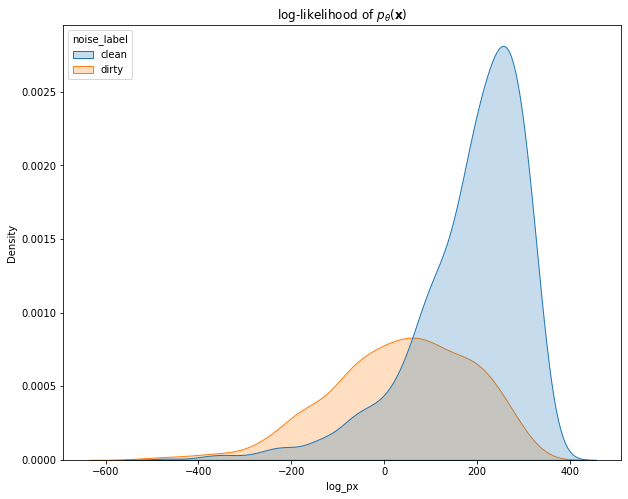

In [69]:
fig, axes = plt.subplots(1,1, figsize=(10,8))

sns.kdeplot(ax=axes, data=df_elbo_iwae, x="log_px", hue="noise_label", fill=True, legend=True)

axes.set_title("log-likelihood of $p_{\\theta}(\mathbf{x})$")
move_legend(axes, "upper left")


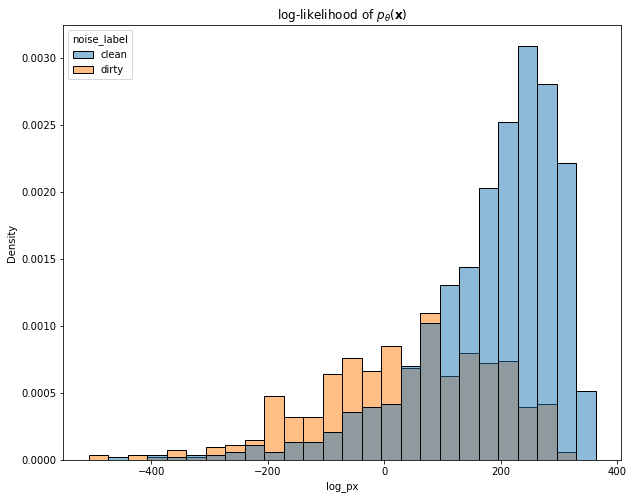

In [70]:
fig, axes = plt.subplots(1,1, figsize=(10,8))

sns.histplot(ax=axes, data=df_elbo_iwae, x="log_px", hue="noise_label", legend=True, stat="density")
axes.set_title("log-likelihood of $p_{\\theta}(\mathbf{x})$")
move_legend(axes, "upper left")


In [71]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins


In [72]:
tops, bin_edges = epdf([log_px_est.numpy().flatten()[~y_noise_instance_train], log_px_est.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [73]:
# Earth Movers Distance (EMD)
np.sum(np.abs(top_model - top_data))

0.025825023854962492

In [74]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [75]:
# Area of intersection between the two histograms
histogram_intersection(tops[0], tops[1], bin_edges)

0.5498040743867854